In [1]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

## Data Load / Import

In [2]:
filepath = '/Users/harshit/Desktop/Personal/Documents/University/QMUL - MSc Data Analytics/Course Work/Semester 3/Dataset'

path_circuit = filepath+'/circuits.csv'
path_constructor_results = filepath + '/constructor_results.csv'
path_constructor_standings = filepath + '/constructor_standings.csv'
path_constructors = filepath + '/constructors.csv'
path_driver_standings = filepath + '/driver_standings.csv'
path_drivers = filepath + '/drivers.csv'
path_lap_times = filepath + '/lap_times.csv'
path_pit_stops = filepath + '/pit_stops.csv'
path_qualifying = filepath + '/qualifying.csv'
path_races = filepath + '/races.csv'
path_results = filepath + '/results.csv'
path_seasons = filepath + '/seasons.csv'
path_sprint_results = filepath + '/sprint_results.csv'
path_status = filepath + '/status.csv'

circuits = pd.read_csv(path_circuit)
constructor_results = pd.read_csv(path_constructor_results)
constructor_standings = pd.read_csv(path_constructor_standings)
constructor = pd.read_csv(path_constructors)
driver_standings = pd.read_csv(path_driver_standings)
drivers = pd.read_csv(path_drivers)
lap_times = pd.read_csv(path_lap_times)
pit_stops = pd.read_csv(path_pit_stops)
qualifying = pd.read_csv(path_qualifying)
races = pd.read_csv(path_races)
results = pd.read_csv(path_results)
seasons = pd.read_csv(path_seasons)
sprint_results = pd.read_csv(path_sprint_results)
path_status = pd.read_csv(path_status)

## Data Preprocessing / Cleaning

In [3]:
races.head()

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  29/03/2009   
1       2  2009      2          2   Malaysian Grand Prix  05/04/2009   
2       3  2009      3         17     Chinese Grand Prix  19/04/2009   
3       4  2009      4          3     Bahrain Grand Prix  26/04/2009   
4       5  2009      5          4     Spanish Grand Prix  10/05/2009   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   

  fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  \
0       \N       \N       \N       \N       \N         \N         \N   
1       \N       \N       \N       \N       \N         \N         \N   
2       \N       \N       \N       \N       \N         \N         \N   
3       \N       \N       \N       \N       \N         \N         \N   
4       \N       \N       \N       \N       \N         \N         \N   

  sprint_date sprint_time   Weather  
0          \N          \N  Not Rain  
1          \N          \N      Rain  
2          \N          \N  Not Rain  
3          \N          \N  Not Rain  
4          \N          \N  Not Rain

In [4]:
races.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'Weather'],
      dtype='object')

In [5]:
#Base table - dropping columns that are not required
races.drop(columns = ['name','time','url','fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'],inplace = True)

In [6]:
races.columns

Index(['raceId', 'year', 'round', 'circuitId', 'date', 'Weather'], dtype='object')

In [7]:
races.head()

raceId  year  round  circuitId        date   Weather
0       1  2009      1          1  29/03/2009  Not Rain
1       2  2009      2          2  05/04/2009      Rain
2       3  2009      3         17  19/04/2009  Not Rain
3       4  2009      4          3  26/04/2009  Not Rain
4       5  2009      5          4  10/05/2009  Not Rain

In [8]:
#Renaming columns of race table
races.rename(columns = {
    'year':'race_year',
    'date':'gp_date',
    'round':'race_sequence_#'
},inplace = True)

In [9]:
races.head()

raceId  race_year  race_sequence_#  circuitId     gp_date   Weather
0       1       2009                1          1  29/03/2009  Not Rain
1       2       2009                2          2  05/04/2009      Rain
2       3       2009                3         17  19/04/2009  Not Rain
3       4       2009                4          3  26/04/2009  Not Rain
4       5       2009                5          4  10/05/2009  Not Rain

In [10]:
results.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1  
4         43    1       1:27.418         218.385         1

In [11]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [12]:
#Dropping unwanted columns from results table
results.drop(columns = [
    'number',
    'position',
    'positionText',
    'fastestLapTime',
    'time',
    'milliseconds'
    ], inplace = True
)

In [13]:
results.head()

resultId  raceId  driverId  constructorId  grid  positionOrder  points  \
0         1      18         1              1     1              1    10.0   
1         2      18         2              2     5              2     8.0   
2         3      18         3              3     7              3     6.0   
3         4      18         4              4    11              4     5.0   
4         5      18         5              1     3              5     4.0   

   laps fastestLap rank fastestLapSpeed  statusId  
0    58         39    2         218.300         1  
1    58         41    3         217.586         1  
2    58         41    5         216.719         1  
3    58         58    7         215.464         1  
4    58         43    1         218.385         1

In [14]:
#Renamining Result table columns
results.rename(columns = 
    {
        #'raceId':'result_raceId',
        #'driverId':'results_driverId',
        #'constructorId':'results_constructorId',
        'grid':'results_starting_grid#',
        'positionOrder':'results_finalPosition',
        'points' : 'results_points',
        'laps' : 'results_laps',
        #'time' : 'results_time',
        #'milliseconds' : 'results_milliseconds',
        'rank' : 'results_fastestlap_rank',
        'fastestLap' : 'results_Lap#_fastest',
        #'fastestLapTime' : 'results_fastestLapTime',
        'fastestLapSpeed' : 'results_fastestLapSpeed',
        'statusId' : 'results_statusId'   
    }
    ,inplace = True
)

In [15]:
results.head()

resultId  raceId  driverId  constructorId  results_starting_grid#  \
0         1      18         1              1                       1   
1         2      18         2              2                       5   
2         3      18         3              3                       7   
3         4      18         4              4                      11   
4         5      18         5              1                       3   

   results_finalPosition  results_points  results_laps results_Lap#_fastest  \
0                      1            10.0            58                   39   
1                      2             8.0            58                   41   
2                      3             6.0            58                   41   
3                      4             5.0            58                   58   
4                      5             4.0            58                   43   

  results_fastestlap_rank results_fastestLapSpeed  results_statusId  
0                       2                 218.300                 1  
1                       3                 217.586                 1  
2                       5                 216.719                 1  
3                       7                 215.464                 1  
4                       1                 218.385                 1

In [16]:
qualifying.head()

qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  00:01:27   
1          2      18         9              2       4         2  00:01:26   
2          3      18         5              1      23         3  00:01:26   
3          4      18        13              6       2         4  00:01:26   
4          5      18         2              2       3         5  00:01:26   

         q2        q3  
0  00:01:25  00:01:27  
1  00:01:25  00:01:27  
2  00:01:25  00:01:27  
3  00:01:26  00:01:27  
4  00:01:26  00:01:27

In [17]:
qualifying.drop(columns = [
    'number',
    'position'
],inplace = True)

In [18]:
qualifying.rename(
    columns = {
        #'raceId' : 'qualifying_raceId',
        #'driverId' : 'qualifying_driverId',
        #'constructorId': 'qualifying_constructorId',
        #'position':'qualifying_final_position',
        'q1' : 'qualifying_q1_time',
        'q2' : 'qualifying_q2_time',
        'q3' : 'qualifying_q3_times'
    }
)

qualifyId  raceId  driverId  constructorId qualifying_q1_time  \
0             1      18         1              1           00:01:27   
1             2      18         9              2           00:01:26   
2             3      18         5              1           00:01:26   
3             4      18        13              6           00:01:26   
4             5      18         2              2           00:01:26   
...         ...     ...       ...            ...                ...   
9810       9868    1110       848              3           00:02:00   
9811       9869    1110       855             51           00:02:01   
9812       9870    1110       858              3           00:02:02   
9813       9871    1110       817            213           00:02:02   
9814       9872    1110       807            210           00:02:03   

     qualifying_q2_time qualifying_q3_times  
0              00:01:25            00:01:27  
1              00:01:25            00:01:27  
2              00:01:25            00:01:27  
3              00:01:26            00:01:27  
4              00:01:26            00:01:27  
...                 ...                 ...  
9810                NaN                 NaN  
9811                NaN                 NaN  
9812                NaN                 NaN  
9813                NaN                 NaN  
9814                NaN                 NaN  

[9815 rows x 7 columns]

In [19]:
drivers.head()

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [20]:
#Combining driver's first & last name
drivers['drivers_name'] = drivers['forename'] + ' '+ drivers['surname']

In [21]:
drivers.head()

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  \
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton   
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld   
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg   
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso   
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen   

        drivers_name  
0     Lewis Hamilton  
1      Nick Heidfeld  
2       Nico Rosberg  
3    Fernando Alonso  
4  Heikki Kovalainen

In [22]:
drivers.drop(
    columns =
    [
        'forename',
        'surname',
        'url',
        'driverRef'
    ],inplace = True
)

In [23]:
drivers.rename(
    columns = {
        'number' : 'drivers_number',
        'code' : 'drivers_code',
        'dob' : 'drivers_dob',
        'nationality' : 'drivers_nationality'
    }
    ,inplace = True
)

In [24]:
drivers.head()

driverId drivers_number drivers_code drivers_dob drivers_nationality  \
0         1             44          HAM  1985-01-07             British   
1         2             \N          HEI  1977-05-10              German   
2         3              6          ROS  1985-06-27              German   
3         4             14          ALO  1981-07-29             Spanish   
4         5             \N          KOV  1981-10-19             Finnish   

        drivers_name  
0     Lewis Hamilton  
1      Nick Heidfeld  
2       Nico Rosberg  
3    Fernando Alonso  
4  Heikki Kovalainen

In [25]:
constructor.head()

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [26]:
constructor.drop(
    columns = [
        'constructorRef',
        'url'
    ],
    inplace = True
)

In [27]:
constructor.rename(
    columns = {
        'name' : 'constructor_name',
        'nationality' : 'constructor_nationality'
    }
    ,inplace = True
)

In [28]:
constructor.head()

constructorId constructor_name constructor_nationality
0              1          McLaren                 British
1              2       BMW Sauber                  German
2              3         Williams                 British
3              4          Renault                  French
4              5       Toro Rosso                 Italian

In [29]:
constructor_results.head()

constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0     \N
1                     2      18              2     8.0     \N
2                     3      18              3     9.0     \N
3                     4      18              4     5.0     \N
4                     5      18              5     2.0     \N

In [30]:
#Checking values of column status to conclude if column is required or not
count = 0
other = 0
temp = {}

for index, item in constructor_results.iterrows():
    if item['status'] == r'\N':
        count+=1
    else: 
        other+=1
        temp[index] = item['status']
print(f'Number of records in the table with status value \\N: {count}')
print(f'Number of records in the table with status values not \\N: {other}')

Number of records in the table with status value \N: 12273
Number of records in the table with status values not \N: 17


In [31]:
temp

{185: 'D',
 195: 'D',
 207: 'D',
 218: 'D',
 228: 'D',
 239: 'D',
 250: 'D',
 262: 'D',
 273: 'D',
 283: 'D',
 294: 'D',
 306: 'D',
 316: 'D',
 328: 'D',
 338: 'D',
 350: 'D',
 361: 'D'}

In [32]:
constructor_results.drop(columns = 'status',inplace = True)

In [33]:
constructor_results.rename(
    columns = {
        #'raceId' : 'constructor_results_raceID',
        #'constructorId' : 'constructor_results_constructorId',
        'points' : 'constructor_results_points'
    },
    inplace = True
)

In [34]:
constructor_results.head()

constructorResultsId  raceId  constructorId  constructor_results_points
0                     1      18              1                        14.0
1                     2      18              2                         8.0
2                     3      18              3                         9.0
3                     4      18              4                         5.0
4                     5      18              5                         2.0

In [35]:
constructor_standings.head()

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0

In [36]:
constructor_standings.drop(
    columns = [
                'position',
                'positionText',
                'points'
              ]
    ,inplace = True
)

In [37]:
constructor_standings.rename(
    columns = {
        #'raceId': 'constructor_standings_raceId',
        #'constructorId' : 'constructor_standings_constructorId',
        'wins':'constructor_standings_wins'
    },inplace = True
)

In [38]:
constructor_standings.head()

constructorStandingsId  raceId  constructorId  constructor_standings_wins
0                       1      18              1                           1
1                       2      18              2                           0
2                       3      18              3                           0
3                       4      18              4                           0
4                       5      18              5                           0

In [39]:
circuits.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url        circuit_type  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  Not Street Circuit  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  Not Street Circuit  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  Not Street Circuit  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  Not Street Circuit  
4         http://en.wikipedia.org/wiki/Istanbul_Park  Not Street Circuit

In [40]:
circuit_copy = circuits.copy()
circuits.drop(
    columns = ['circuitRef',
               'lat',
               'lng',
               'url',
               'alt'
              ],
    inplace = True
)

In [41]:
circuits.rename(
    columns = {
        'name': 'circuits_name',
        'location' : 'circuits_location',
        'country' : 'circuits_country',
        #'lat' : 'circuits_lat',
        #'lng' : 'circuits_lng',
        #'url' : 'circuits_url'
    },
    inplace = True
)

In [42]:
circuits.head()

circuitId                   circuits_name circuits_location  \
0          1  Albert Park Grand Prix Circuit         Melbourne   
1          2    Sepang International Circuit      Kuala Lumpur   
2          3   Bahrain International Circuit            Sakhir   
3          4  Circuit de Barcelona-Catalunya          Montmeló   
4          5                   Istanbul Park          Istanbul   

  circuits_country        circuit_type  
0        Australia  Not Street Circuit  
1         Malaysia  Not Street Circuit  
2          Bahrain  Not Street Circuit  
3            Spain  Not Street Circuit  
4           Turkey  Not Street Circuit

In [43]:
lap_times.head()

raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342

In [44]:
lap_times.describe()
#Number of records = 551,742

raceId       driverId            lap       position  \
count  551742.000000  551742.000000  551742.000000  551742.000000   
mean      564.878467     296.918785      29.990193       9.658699   
std       425.883069     377.935897      18.420399       5.538011   
min         1.000000       1.000000       1.000000       1.000000   
25%       131.000000      15.000000      14.000000       5.000000   
50%       846.000000      39.000000      29.000000       9.000000   
75%       976.000000     817.000000      44.000000      14.000000   
max      1110.000000     858.000000      87.000000      24.000000   

       milliseconds  
count  5.517420e+05  
mean   9.570621e+04  
std    7.478605e+04  
min    5.540400e+04  
25%    8.199300e+04  
50%    9.067300e+04  
75%    1.022430e+05  
max    7.507547e+06

In [45]:
lap_times.drop(
    columns = ['milliseconds'],
    inplace = True
)

In [46]:
lap_times.rename(
    columns = {
        #'raceId' : 'lap_times_raceId',
        #'driverId' : 'lap_times_driverId',
        #'lap' : 'lap_times_lap#',
        'position' : 'lap_times_position#',
        'time':'lap_times_driverTimeLap'
    },
    inplace = True
)

In [47]:
lap_times.head()

raceId  driverId  lap  lap_times_position# lap_times_driverTimeLap
0     841        20    1                    1                1:38.109
1     841        20    2                    1                1:33.006
2     841        20    3                    1                1:32.713
3     841        20    4                    1                1:32.803
4     841        20    5                    1                1:32.342

In [48]:
pit_stops.head()

raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251
4     841        13     1   13  17:24:10   23.842         23842

In [49]:
pit_stops.drop(
    columns = [
        'time',
        'milliseconds'
    ]
    ,inplace = True
)

In [50]:
pit_stops.rename(
    columns = {
        #'raceId' : 'pit_stops_raceId',
        #'driverId' : 'pit_stops_driverId',
        'stop' : 'pit_stops_#pitStopRace',
        #'lap' : 'pit_stops_lap#',
        'duration' : 'pit_stops_duration'
    },
    inplace = True
)

In [51]:
pit_stops.head()

raceId  driverId  pit_stops_#pitStopRace  lap pit_stops_duration
0     841       153                       1    1             26.898
1     841        30                       1    1             25.021
2     841        17                       1   11             23.426
3     841         4                       1   12             23.251
4     841        13                       1   13             23.842

In [52]:
#Merging dataframe to create a single dataset
data_merge1 = pd.merge(races,results,how = 'inner',on = 'raceId')
data_merge2 = pd.merge(data_merge1,qualifying, how = 'inner', on = ['raceId','driverId','constructorId'])
data_merge3 = pd.merge(data_merge2,drivers, how = 'inner', on ='driverId')
data_merge4 = pd.merge(data_merge3,constructor,how='inner',on=['constructorId'])
data_merge5 = pd.merge(data_merge4,constructor_standings, how = 'inner',on = ['raceId', 'constructorId'])
data_merge6 = pd.merge(data_merge5,circuits, how ='inner', on = 'circuitId')

In [53]:
data_merge6.head()

raceId  race_year  race_sequence_#  circuitId     gp_date   Weather  \
0       1       2009                1          1  29/03/2009  Not Rain   
1       1       2009                1          1  29/03/2009  Not Rain   
2      36       2007                1          1  18/03/2007  Not Rain   
3      36       2007                1          1  18/03/2007  Not Rain   
4      55       2006                3          1  02/04/2006  Not Rain   

   resultId  driverId  constructorId  results_starting_grid#  ...  \
0      7554        18             23                       1  ...   
1      7555        22             23                       2  ...   
2       383        18             11                      14  ...   
3       379        22             11                      16  ...   
4       796        18             11                       1  ...   

   drivers_nationality        drivers_name  constructor_name  \
0              British       Jenson Button             Brawn   
1            Brazilian  Rubens Barrichello             Brawn   
2              British       Jenson Button             Honda   
3            Brazilian  Rubens Barrichello             Honda   
4              British       Jenson Button             Honda   

  constructor_nationality constructorStandingsId constructor_standings_wins  \
0                 British                   4038                          1   
1                 British                   4038                          1   
2                Japanese                  25739                          0   
3                Japanese                  25739                          0   
4                Japanese                   6342                          0   

                    circuits_name  circuits_location circuits_country  \
0  Albert Park Grand Prix Circuit          Melbourne        Australia   
1  Albert Park Grand Prix Circuit          Melbourne        Australia   
2  Albert Park Grand Prix Circuit          Melbourne        Australia   
3  Albert Park Grand Prix Circuit          Melbourne        Australia   
4  Albert Park Grand Prix Circuit          Melbourne        Australia   

         circuit_type  
0  Not Street Circuit  
1  Not Street Circuit  
2  Not Street Circuit  
3  Not Street Circuit  
4  Not Street Circuit  

[5 rows x 34 columns]

In [54]:
data_merge6.describe()

raceId    race_year  race_sequence_#    circuitId      resultId  \
count  9710.000000  9710.000000      9710.000000  9710.000000   9710.000000   
mean    593.196189  2010.493615         9.661689    18.924717  14886.373223   
std     421.239935     8.177422         5.552339    19.830968  10160.121382   
min       1.000000  1994.000000         1.000000     1.000000      1.000000   
25%     119.000000  2005.000000         5.000000     7.000000   3840.250000   
50%     858.000000  2011.000000         9.000000    13.000000  21189.500000   
75%     982.000000  2017.000000        14.000000    21.000000  23649.750000   
max    1110.000000  2023.000000        22.000000    79.000000  26085.000000   

          driverId  constructorId  results_starting_grid#  \
count  9710.000000    9710.000000             9710.000000   
mean    316.498970      44.827703               11.082801   
std     382.023027      70.942638                6.308424   
min       1.000000       1.000000                0.000000   
25%      16.000000       4.000000                6.000000   
50%      50.000000       9.000000               11.000000   
75%     818.000000      28.000000               16.000000   
max     858.000000     214.000000               26.000000   

       results_finalPosition  results_points  results_laps  results_statusId  \
count            9710.000000     9710.000000   9710.000000       9710.000000   
mean               11.200618        3.495675     51.530793          9.307312   
std                 6.297195        5.971314     19.737437         17.000267   
min                 1.000000        0.000000      0.000000          1.000000   
25%                 6.000000        0.000000     47.000000          1.000000   
50%                11.000000        0.000000     56.000000          4.000000   
75%                16.000000        5.000000     66.000000         11.000000   
max                28.000000       50.000000     87.000000        141.000000   

         qualifyId  constructorStandingsId  constructor_standings_wins  
count  9710.000000             9710.000000                 9710.000000  
mean   4946.986921            20375.941401                    0.911432  
std    2845.470654             9801.669428                    2.315158  
min       1.000000                1.000000                    0.000000  
25%    2508.250000             8535.000000                    0.000000  
50%    4950.500000            25622.500000                    0.000000  
75%    7409.750000            27075.000000                    0.000000  
max    9872.000000            28572.000000                   19.000000

In [55]:
#Check if there are any null records after merging
filtered_df = data_merge6[data_merge6['resultId'].isnull() | (data_merge6['resultId'] == '')]
filtered_df.head(100)
filtered_df.describe()

raceId  race_year  race_sequence_#  circuitId  resultId  driverId  \
count     0.0        0.0              0.0        0.0       0.0       0.0   
mean      NaN        NaN              NaN        NaN       NaN       NaN   
std       NaN        NaN              NaN        NaN       NaN       NaN   
min       NaN        NaN              NaN        NaN       NaN       NaN   
25%       NaN        NaN              NaN        NaN       NaN       NaN   
50%       NaN        NaN              NaN        NaN       NaN       NaN   
75%       NaN        NaN              NaN        NaN       NaN       NaN   
max       NaN        NaN              NaN        NaN       NaN       NaN   

       constructorId  results_starting_grid#  results_finalPosition  \
count            0.0                     0.0                    0.0   
mean             NaN                     NaN                    NaN   
std              NaN                     NaN                    NaN   
min              NaN                     NaN                    NaN   
25%              NaN                     NaN                    NaN   
50%              NaN                     NaN                    NaN   
75%              NaN                     NaN                    NaN   
max              NaN                     NaN                    NaN   

       results_points  results_laps  results_statusId  qualifyId  \
count             0.0           0.0               0.0        0.0   
mean              NaN           NaN               NaN        NaN   
std               NaN           NaN               NaN        NaN   
min               NaN           NaN               NaN        NaN   
25%               NaN           NaN               NaN        NaN   
50%               NaN           NaN               NaN        NaN   
75%               NaN           NaN               NaN        NaN   
max               NaN           NaN               NaN        NaN   

       constructorStandingsId  constructor_standings_wins  
count                     0.0                         0.0  
mean                      NaN                         NaN  
std                       NaN                         NaN  
min                       NaN                         NaN  
25%                       NaN                         NaN  
50%                       NaN                         NaN  
75%                       NaN                         NaN  
max                       NaN                         NaN

In [56]:
# Convert q1 to datetime and extract only the time part, ignoring NaN values
#data_merge6['q1'] = pd.to_datetime(data_merge6['q1'],unit = 's')
data_merge6['q1'] = pd.to_datetime(data_merge6['q1'], format='%M:%S:%f', errors='coerce').dt.strftime('%M:%S:%f')
# Verify the change
print(data_merge6.dtypes)
print(data_merge6['q1'])

#Datatype not changing from object to datetime

raceId                          int64
race_year                       int64
race_sequence_#                 int64
circuitId                       int64
gp_date                        object
Weather                        object
resultId                        int64
driverId                        int64
constructorId                   int64
results_starting_grid#          int64
results_finalPosition           int64
results_points                float64
results_laps                    int64
results_Lap#_fastest           object
results_fastestlap_rank        object
results_fastestLapSpeed        object
results_statusId                int64
qualifyId                       int64
q1                             object
q2                             object
q3                             object
drivers_number                 object
drivers_code                   object
drivers_dob                    object
drivers_nationality            object
drivers_name                   object
constructor_

In [57]:
data_merge6['drivers_dob'] = pd.to_datetime(data_merge6['drivers_dob'])
data_merge6['gp_date'] = pd.to_datetime(data_merge6['gp_date'])

/var/folders/hz/4z22rm6d1cv1n0lvyz_hzvq80000gn/T/ipykernel_10514/705791012.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_merge6['gp_date'] = pd.to_datetime(data_merge6['gp_date'])


In [58]:
data_merge6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9710 entries, 0 to 9709
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   raceId                      9710 non-null   int64         
 1   race_year                   9710 non-null   int64         
 2   race_sequence_#             9710 non-null   int64         
 3   circuitId                   9710 non-null   int64         
 4   gp_date                     9710 non-null   datetime64[ns]
 5   Weather                     9710 non-null   object        
 6   resultId                    9710 non-null   int64         
 7   driverId                    9710 non-null   int64         
 8   constructorId               9710 non-null   int64         
 9   results_starting_grid#      9710 non-null   int64         
 10  results_finalPosition       9710 non-null   int64         
 11  results_points              9710 non-null   float64     

In [59]:
#Replacing string \N values to 0 and modifying datatypes
data_merge6['results_fastestLapSpeed'] = data_merge6['results_fastestLapSpeed'].replace(r'\N',0)
data_merge6['results_fastestLapSpeed'] = data_merge6['results_fastestLapSpeed'].astype(float)
data_merge6['results_Lap#_fastest'] = data_merge6['results_Lap#_fastest'].replace(r'\N',0)
data_merge6['results_Lap#_fastest'] = data_merge6['results_Lap#_fastest'].astype(int)
data_merge6['results_fastestlap_rank'] = data_merge6['results_fastestlap_rank'].replace(r'\N',0)
data_merge6['results_fastestlap_rank'] = data_merge6['results_fastestlap_rank'].astype(int)
data_merge6['drivers_number'] = data_merge6['drivers_number'].replace(r'\N',0)
data_merge6['drivers_number'] = data_merge6['drivers_number'].astype(int)


column_list = ['drivers_code','drivers_nationality','drivers_name','constructor_name','constructor_nationality','circuits_name','circuits_location','circuits_country']
for item in column_list:
    data_merge6[item] = data_merge6[item].astype('string')

In [60]:
data_merge6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9710 entries, 0 to 9709
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   raceId                      9710 non-null   int64         
 1   race_year                   9710 non-null   int64         
 2   race_sequence_#             9710 non-null   int64         
 3   circuitId                   9710 non-null   int64         
 4   gp_date                     9710 non-null   datetime64[ns]
 5   Weather                     9710 non-null   object        
 6   resultId                    9710 non-null   int64         
 7   driverId                    9710 non-null   int64         
 8   constructorId               9710 non-null   int64         
 9   results_starting_grid#      9710 non-null   int64         
 10  results_finalPosition       9710 non-null   int64         
 11  results_points              9710 non-null   float64     

In [61]:
#New feature: Driver age
data_merge6['drivers_age_at_gp_years'] = abs(data_merge6['gp_date'] - data_merge6['drivers_dob'])/365

#Splitting above output, to select only the first element that is the driver age
data_merge6['drivers_age_at_gp_years'] = data_merge6['drivers_age_at_gp_years'].apply(lambda x: str(x).split(' ')[0])
data_merge6['drivers_age_at_gp_years'] = data_merge6['drivers_age_at_gp_years'].astype(int)

In [62]:
#Renaming main dataframe
Dataset = data_merge6

In [63]:
#Replacing categorical values with numercial values
Dataset['Weather'].unique() #Not Rain & Rain
Dataset['Weather'] = Dataset['Weather'].replace('Not Rain', 0)
Dataset['Weather'] = Dataset['Weather'].replace('Rain', 1)
Dataset['Weather'] = Dataset['Weather'].astype(int)

In [64]:
Dataset['circuit_type'].unique() #Not Street Circuit & Street Circuit
Dataset['circuit_type'] = Dataset['circuit_type'].replace('Not Street Circuit',0)
Dataset['circuit_type'] = Dataset['circuit_type'].replace('Street Circuit',1)
Dataset['circuit_type'] = Dataset['circuit_type'].astype(int)

In [65]:
#Dictionary for new input / attributes
Nationality_Country = {
    'American' : 'USA',
    'Argentine' : 'Argentina',
    'Australian' : 'Australia',
    'Austrian' : 'Austria',
    'Belgian' : 'Belgium',
    'Brazilian' : 'Brazil',
    'British' : 'UK',
    'Canadian' : 'Canada',
    'Chinese' : 'China',
    'Colombian' : 'Columbia',
    'Czech' : 'Czech',
    'Danish' : 'Denmark',
    'Dutch' : 'Netherlands',
    'Finnish' : 'Finland',
    'French' : 'France',
    'German' : 'Germany',
    'Hungarian' : 'Hungary',
    'Indian' : 'India',
    'Indonesian' : 'Indonesia',
    'Irish' : 'Ireland',
    'Italian' : 'Italy',
    'Japanese' : 'Japan',
    'Malaysian' : 'Malaysia',
    'Mexican' : 'Mexico',
    'Monegasque' : 'Monaco',
    'New Zealander' : 'New Zealand',
    'Polish' : 'Poland',
    'Portuguese' : 'Portugal',
    'Russian' : 'Russia',
    'Spanish' : 'Spain',
    'Swedish' : 'Sweden',
    'Swiss' : 'Swizterland',
    'Thai' : 'Thailand',
    'Venezuelan' : 'Venezuela'
}

#### New Feature / Attribute Flags

In [66]:
#New attribute: Driver country - Required for driver home / away race flag
Dataset['drivers_country'] = Dataset['drivers_nationality'] 
for index, item in Dataset.iterrows():
    value = item['drivers_nationality']
    Dataset['drivers_country'][index] = Nationality_Country[value]

In [67]:
#New attribute: Constructor country - Required for constructor home / away race flag
Dataset['constructor_country'] = Dataset['constructor_nationality']
for index, item in Dataset.iterrows():
    value = item['constructor_nationality']
    Dataset['constructor_country'][index] = Nationality_Country[value]

In [68]:
#New feature: Driver home race flag
Dataset['drivers_home_race'] = 0 #Away Race
for index, item in Dataset.iterrows():
    if (item['drivers_country'] == item['circuits_country']):
        Dataset.loc[index, 'drivers_home_race'] = 1 #Home Race 

In [69]:
#New feature: Constructor home race flag
Dataset['constructors_home_race'] = 0 #Away Race
for index, item in Dataset.iterrows():
    if (item['constructor_country'] == item['circuits_country']):
        #Dataset['drivers_home_race'][index] = 1
        Dataset.loc[index, 'constructors_home_race'] = 1 #Home race

In [70]:
DNF_Status = [141,140,139,138,137,136,135,132,131,130,129,126,121,110,109,108,107,106,105,104,103,102,101,100,99,98,97,96,95,94,93,92,
91,90,89,87,86,85,84,83,82,80,79,78,76,75,74,73,72,71,70,69,68,67,66,63,62,60,56,54,51,49,48,47,46,44,43,42,41,40,39,38,
37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,10,9,8,7,6,5,4,3,2]

In [71]:
#New feature: Driver DNF - Did Not Finish Race
Dataset['Drivers_DNF'] = 0 #Driver finished race
for index, item in Dataset.iterrows():
    if((item['results_statusId']) in DNF_Status):
        Dataset.loc[index,'Drivers_DNF'] = 1 #Driver DID NOT finish race

#### Random Forest implementation - Predict Driver Experience Flag

In [72]:
#Classify driver performance based on race results
def classify_performance(final_position):
    if 1 <= final_position <= 5:
        return '1' #Strong
    elif 6 <= final_position <= 14:
        return '2' #Average
    elif 15 <= final_position <= 22:
        return '3' #Bad
    else:
        return '0' #Unkown

# Apply the function to create a performance classification column
Dataset['performance'] = Dataset['results_finalPosition'].apply(classify_performance)

# Filter data before 2010
Dataset_pre_2010 = Dataset[Dataset['race_year'] < 2010].copy()
Dataset_post_2010 = Dataset[Dataset['race_year'] >= 2010].copy()

# Prepare the features and target variable
features = ['race_sequence_#', 'Weather', 'results_starting_grid#', 'results_laps', 
            'drivers_age_at_gp_years', 'drivers_home_race', 'Drivers_DNF', 'circuit_type']
target = 'performance'

# Encode the target variable
label_encoder = LabelEncoder()
Dataset_pre_2010['performance_encoded'] = label_encoder.fit_transform(Dataset_pre_2010[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Dataset_pre_2010[features], Dataset_pre_2010['performance_encoded'], test_size=0.2, random_state=42)

# Train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Predict the driver experience rank for data from 2010 to 2020
Dataset_post_2010['performance_pred'] = clf.predict(Dataset_post_2010[features])
Dataset_post_2010['performance_pred'] = label_encoder.inverse_transform(Dataset_post_2010['performance_pred'])

# Assign 'new driver' to drivers with no historical data
Dataset_post_2010.loc[:, 'driver_experience_rank'] = Dataset_post_2010.apply(
    lambda row: 4 if row['drivers_code'] not in Dataset_pre_2010['drivers_code'].unique() else row['performance_pred'], axis=1
)

# Combine the data back
Dataset_combined = pd.concat([Dataset_pre_2010, Dataset_post_2010], ignore_index=True)

# Clean up the dataframe
Dataset_combined['driver_experience_rank'] = Dataset_combined.apply(
    lambda row: row['performance'] if row['race_year'] < 2010 else row['driver_experience_rank'], axis=1
)
Dataset_combined['driver_experience_rank'] = Dataset_combined['driver_experience_rank'].astype(int)
Dataset_combined = Dataset_combined.drop(columns=['performance', 'performance_encoded', 'performance_pred'])

# Save the updated dataframe
#Dataset_combined.to_csv('Dataset_with_Experience_Rank.csv', index=False)

# Display the first few rows of the updated dataframe
#print(Dataset_combined.head())

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        17
           1       0.71      0.60      0.65       187
           2       0.70      0.73      0.71       353
           3       0.75      0.84      0.79       242

    accuracy                           0.72       799
   macro avg       0.67      0.56      0.57       799
weighted avg       0.71      0.72      0.71       799

Accuracy Score: 0.7196495619524406
Confusion Matrix:
[[  1   0   1  15]
 [  0 113  72   2]
 [  0  46 258  49]
 [  1   0  38 203]]


In [73]:
Dataset_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9710 entries, 0 to 9709
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   raceId                      9710 non-null   int64         
 1   race_year                   9710 non-null   int64         
 2   race_sequence_#             9710 non-null   int64         
 3   circuitId                   9710 non-null   int64         
 4   gp_date                     9710 non-null   datetime64[ns]
 5   Weather                     9710 non-null   int64         
 6   resultId                    9710 non-null   int64         
 7   driverId                    9710 non-null   int64         
 8   constructorId               9710 non-null   int64         
 9   results_starting_grid#      9710 non-null   int64         
 10  results_finalPosition       9710 non-null   int64         
 11  results_points              9710 non-null   float64     

In [74]:
#New attribute: Podium finish flag
Dataset_combined['Drivers_Podium_raceFinish'] = 0 #No Podium finish
for index, item in Dataset_combined.iterrows():
    if((item['results_finalPosition'] == 1) | (item['results_finalPosition'] == 2) | (item['results_finalPosition'] == 1)):
        Dataset_combined.loc[index,'Drivers_Podium_raceFinish'] = 1 #Podium finish

#New attribute: Pole finish flag
Dataset_combined['Drivers_Pole_raceFinish'] = 0 #No Podium finish
for index, item in Dataset_combined.iterrows():
    if(item['results_finalPosition'] == 1):
        Dataset_combined.loc[index,'Drivers_Pole_raceFinish'] = 1 #Podium finish

In [75]:
#Saving final filtered dataset of formula 1 to a csv
#output_csv_file = 'Temp12.csv'
#output_csv_path = f'/Users/harshit/Desktop/Personal/Documents/University/QMUL - MSc Data Analytics/Course Work/Semester 3/Code Files/{output_csv_file}'
#Dataset.to_csv(output_csv_path,index = False)

#Limit Dataset
Dataset = Dataset_combined[(Dataset_combined['race_year'] > 2009) & (Dataset_combined['race_year'] <= 2020)]
Dataset_combined.to_csv('Dataset.csv', index=False)

#### Exploratory Data Analysis

In [76]:
Dataset = Dataset_combined[(Dataset_combined['race_year'] > 2009) & (Dataset_combined['race_year'] <= 2020)]

In [77]:
#Display locations of formula 1 circuits on world map. Add tooltip for wikipedia URL
#https://realpython.com/python-folium-web-maps-from-data/

def circuit_map_plot():
    circuit_map = folium.Map(location=[20, 0], zoom_start=2) # Initialize a map centered around the geographical center of the data
    #Loop to add markers for each circuit
    for idx, row in circuit_copy.iterrows():
        folium.Marker(
            location=[row['lat'], row['lng']],
            popup=f"<b>{row['name']}</b><br>{row['location']}, {row['country']}<br><a href='{row['url']}' target='_blank'>More info</a>",
            tooltip=row['name']
        ).add_to(circuit_map)
    #circuit_map.save('circuits_map.html')
    return circuit_map

circuit_map = circuit_map_plot()
circuit_map

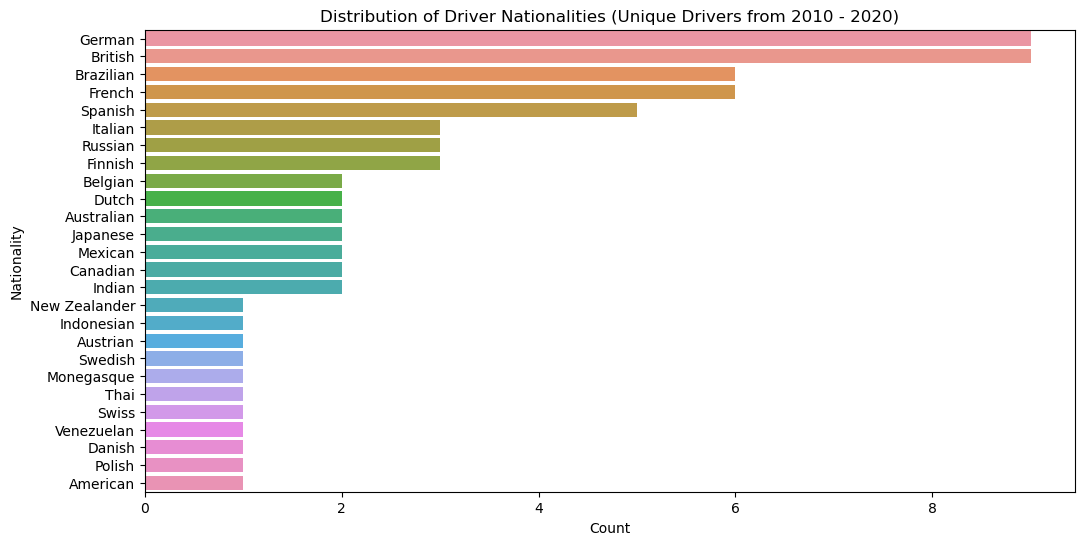

In [78]:
#Plotting number of drivers per country / nationality
def driver_nationality_plot():
    unique_drivers = Dataset[['drivers_code','drivers_nationality']].drop_duplicates()
    nationality_counts = unique_drivers['drivers_nationality'].value_counts().reset_index()
    nationality_counts.columns = ['drivers_nationality','count']

    plt.figure(figsize = (12,6))
    sns.barplot(y='drivers_nationality',x = 'count', data = nationality_counts, order = nationality_counts['drivers_nationality'])
    plt.title('Distribution of Driver Nationalities (Unique Drivers from 2010 - 2020)')
    plt.xlabel('Count')
    plt.ylabel('Nationality')
    plt.show()
    
driver_nationality_plot()

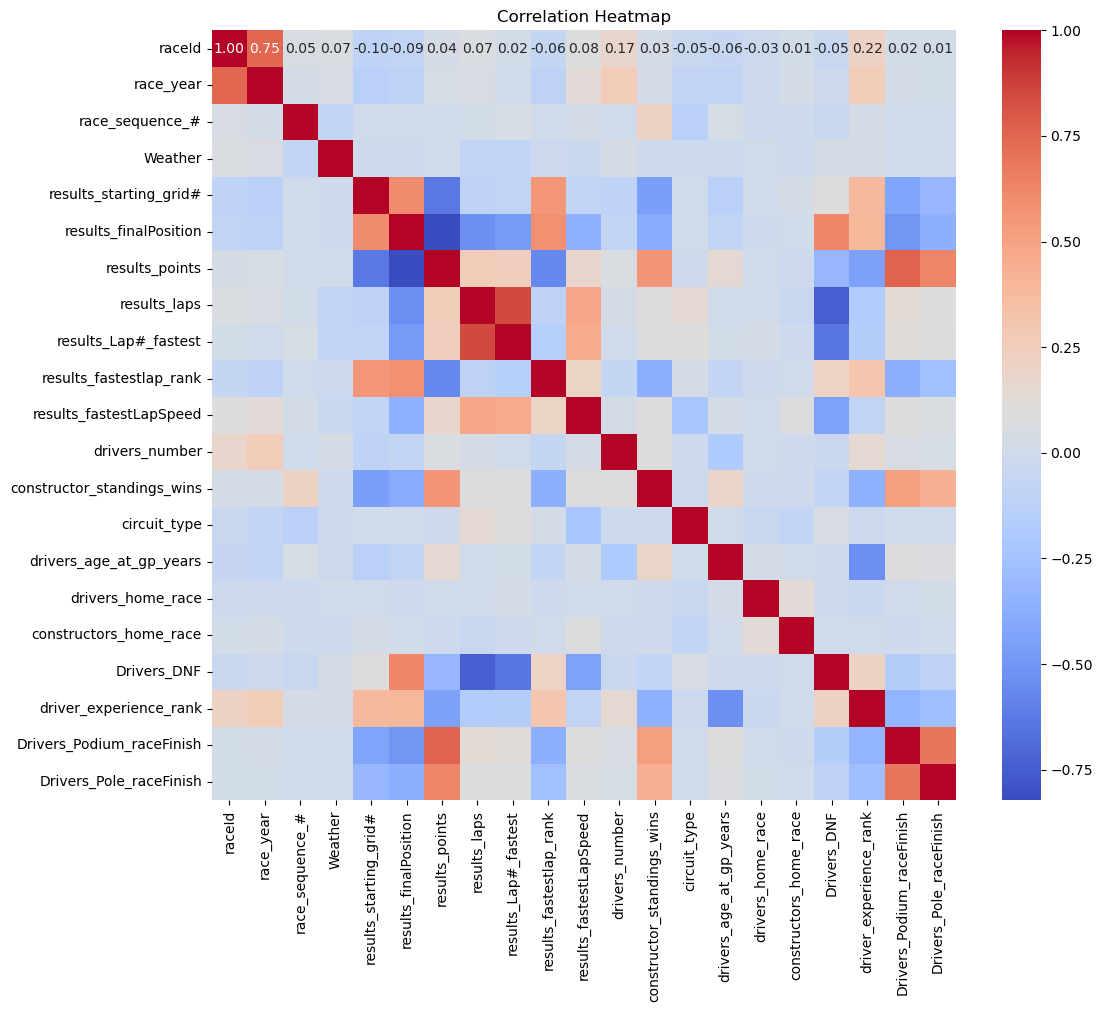

In [79]:
#Correlation Matrix 

def correlation_matrix():
    #Custom dataframe for a clean correlation matrix output. Removing IDs
    Drop_columns = ['qualifyId','circuitId','resultId','driverId','constructorId','results_statusId','constructorStandingsId']
    Dataset_filter = Dataset.drop(columns = Drop_columns)
    
    #Dataset has string & numeric columsn. Selecting only numeric columns
    numeric_columns = Dataset_filter.select_dtypes(include=[np.number])
    correlation_matrix = numeric_columns.corr()

    #To identify relationships and dependencies between variables.
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
    
correlation_matrix()

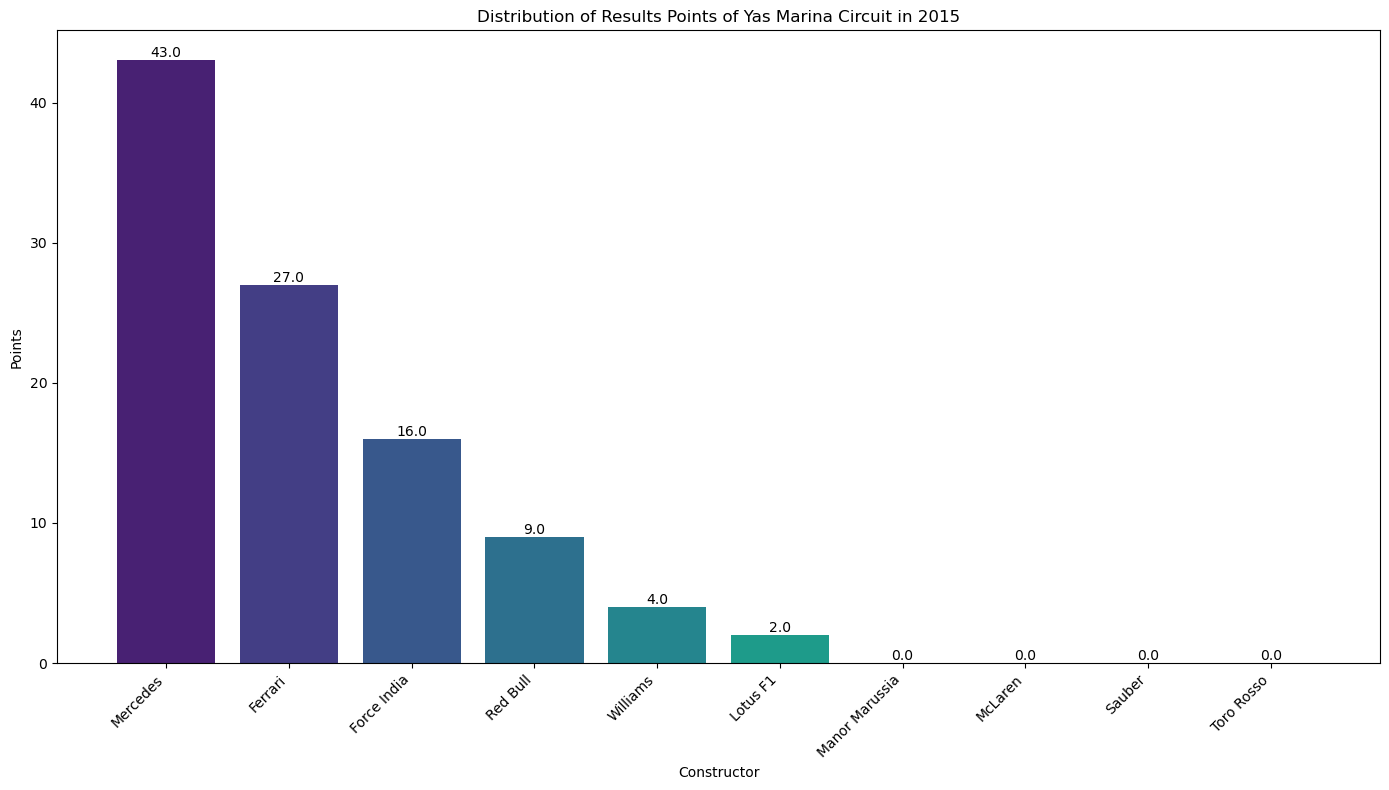

In [80]:
#Plot - Display constructor points awarded per circuit for the mentioned year
def results_points_dist_circuit (raceYear, circuitName):
    Dataset_func = Dataset[(Dataset['race_year'] == raceYear)]
    selectedColumns = ['race_sequence_#', 'circuits_name', 'drivers_name', 'constructor_name', 'results_points']
    Filtered_Data = Dataset_func[selectedColumns]
    Super_Filter = Filtered_Data.groupby(['constructor_name', 'circuits_name']).agg({'results_points': 'sum'}).reset_index()

    Final_filter = Super_Filter[Super_Filter['circuits_name'] == circuitName]
    Final_filter = Final_filter.sort_values(by='results_points', ascending=False)
    colors = sns.color_palette("viridis", len(Final_filter))
    plt.figure(figsize=(14, 8))

    bars = plt.bar(Final_filter['constructor_name'], Final_filter['results_points'], color=colors)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

    plt.title(f'Distribution of Results Points of {circuitName} in {raceYear}')
    plt.xlabel('Constructor')
    plt.ylabel('Points')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
    plt.show()

#Function call
results_points_dist_circuit(2015,'Yas Marina Circuit')

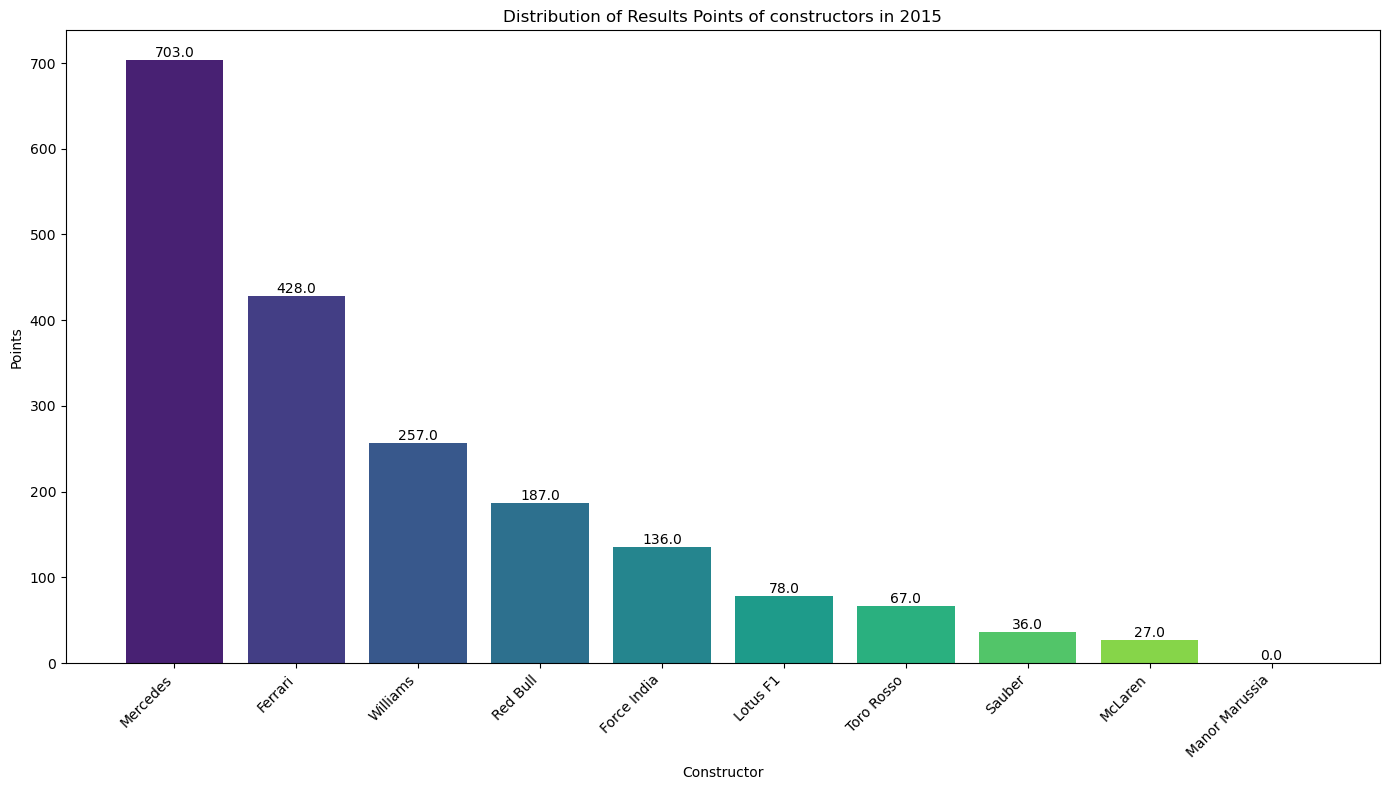

In [81]:
def result_point_dist_constructor(raceYear):
    filterDataset = Dataset[(Dataset['race_year'] == raceYear)]
    selectedColumns = ['race_sequence_#', 'circuits_name', 'drivers_name', 'constructor_name', 'results_points']
    filterDataset_2 = filterDataset[selectedColumns]
    GroupData = filterDataset_2.groupby(['constructor_name']).agg({'results_points':'sum'}).reset_index()
    Final_filter = GroupData.sort_values(by='results_points', ascending=False)
    colors = sns.color_palette("viridis", len(Final_filter))
    plt.figure(figsize=(14, 8))

    bars = plt.bar(Final_filter['constructor_name'], Final_filter['results_points'], color=colors)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

    plt.title(f'Distribution of Results Points of constructors in {raceYear}')
    plt.xlabel('Constructor')
    plt.ylabel('Points')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
    plt.show()

#Function call
result_point_dist_constructor(2015)

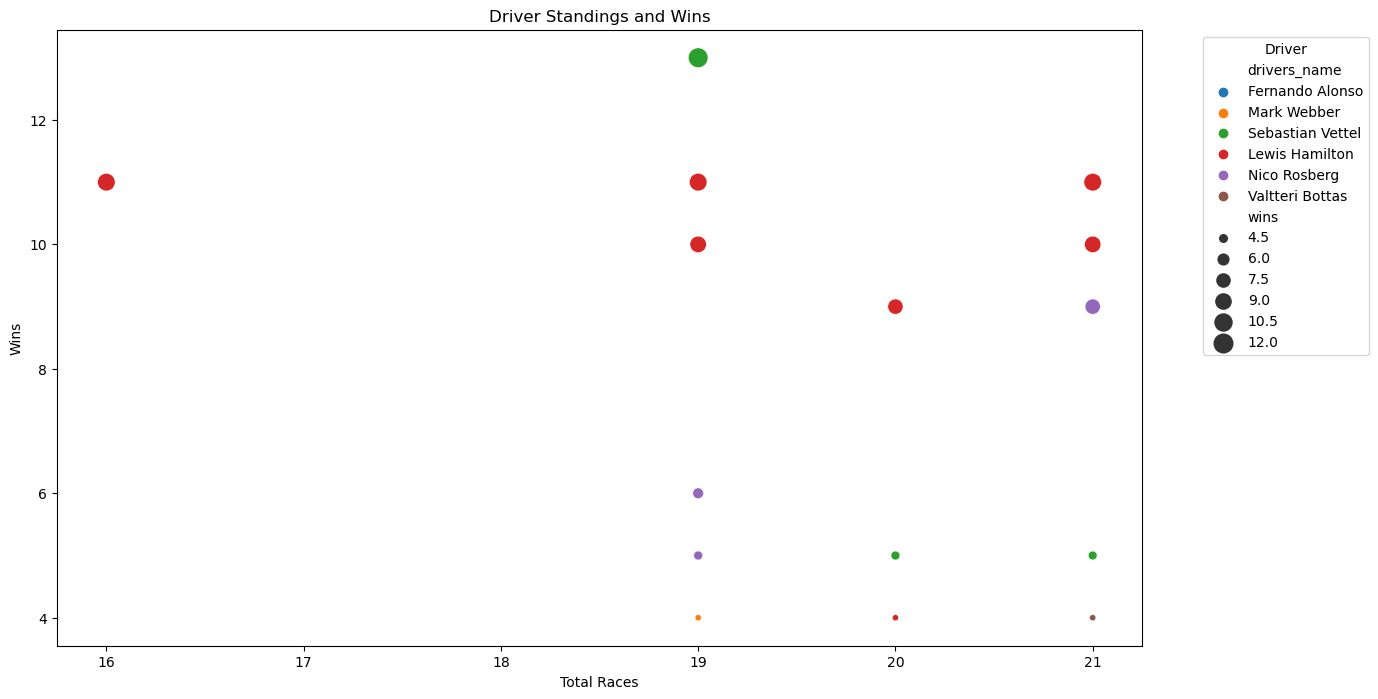

In [82]:
def Driver_Standings():
    #Aggregate driver standings and wins
    driver_standing_wins = Dataset.groupby(['race_year', 'drivers_name'])['results_finalPosition'].count().reset_index(name='total_races')
    driver_wins_per_season = Dataset[Dataset['results_finalPosition'] == 1].groupby(['race_year', 'drivers_name'])['results_finalPosition'].count().reset_index(name='wins')
    driver_standing_wins = pd.merge(driver_standing_wins, driver_wins_per_season, on=['race_year', 'drivers_name'], how='left').fillna(0)
    final_drivers = driver_standing_wins[driver_standing_wins['wins'] > 3]

    #Plot driver standings and wins per season
    plt.figure(figsize=(14, 8))
    scatter_plot = sns.scatterplot(x='total_races', y='wins', hue='drivers_name', size='wins', data=final_drivers, sizes=(20, 200))
    plt.title('Driver Standings and Wins')
    plt.xlabel('Total Races')
    plt.ylabel('Wins')
    plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

Driver_Standings()

In [83]:
Dataset.columns

Index(['raceId', 'race_year', 'race_sequence_#', 'circuitId', 'gp_date',
       'Weather', 'resultId', 'driverId', 'constructorId',
       'results_starting_grid#', 'results_finalPosition', 'results_points',
       'results_laps', 'results_Lap#_fastest', 'results_fastestlap_rank',
       'results_fastestLapSpeed', 'results_statusId', 'qualifyId', 'q1', 'q2',
       'q3', 'drivers_number', 'drivers_code', 'drivers_dob',
       'drivers_nationality', 'drivers_name', 'constructor_name',
       'constructor_nationality', 'constructorStandingsId',
       'constructor_standings_wins', 'circuits_name', 'circuits_location',
       'circuits_country', 'circuit_type', 'drivers_age_at_gp_years',
       'drivers_country', 'constructor_country', 'drivers_home_race',
       'constructors_home_race', 'Drivers_DNF', 'driver_experience_rank',
       'Drivers_Podium_raceFinish', 'Drivers_Pole_raceFinish'],
      dtype='object')

In [84]:
GroupData = Dataset.groupby(['race_year','constructor_name']).agg({'results_points':'sum'}).reset_index()

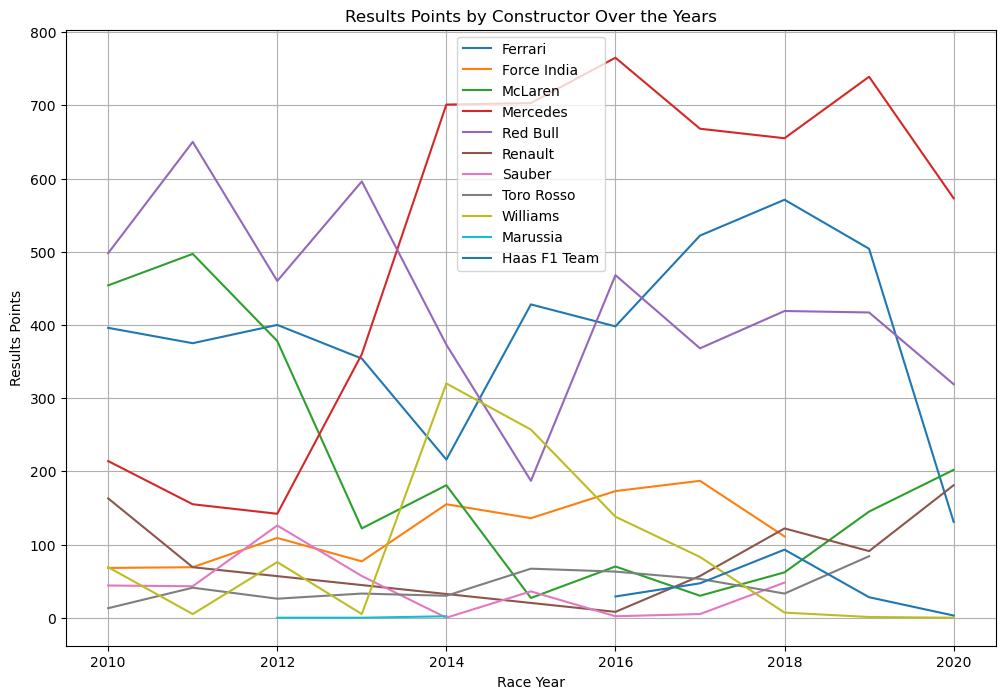

In [85]:
# List of constructors to exclude
exclude_constructors = ['Caterham', 'Virgin', 'Lotus','Lotus F1', 'HRT', 'Manor Marussia', 'Alfa Romeo', 'Racing Point', 'AlphaTauri']
# Filtering out the constructors to be excluded
filtered_data = GroupData[~GroupData['constructor_name'].isin(exclude_constructors)]
# Plotting line charts for each constructor
constructors = filtered_data['constructor_name'].unique()
plt.figure(figsize=(12, 8))

for constructor in constructors:
    constructor_data = GroupData[GroupData['constructor_name'] == constructor]
    plt.plot(constructor_data['race_year'], constructor_data['results_points'], label=constructor)

plt.xlabel('Race Year')
plt.ylabel('Results Points')
plt.title('Results Points by Constructor Over the Years')
plt.legend()
plt.grid(True)
plt.show()

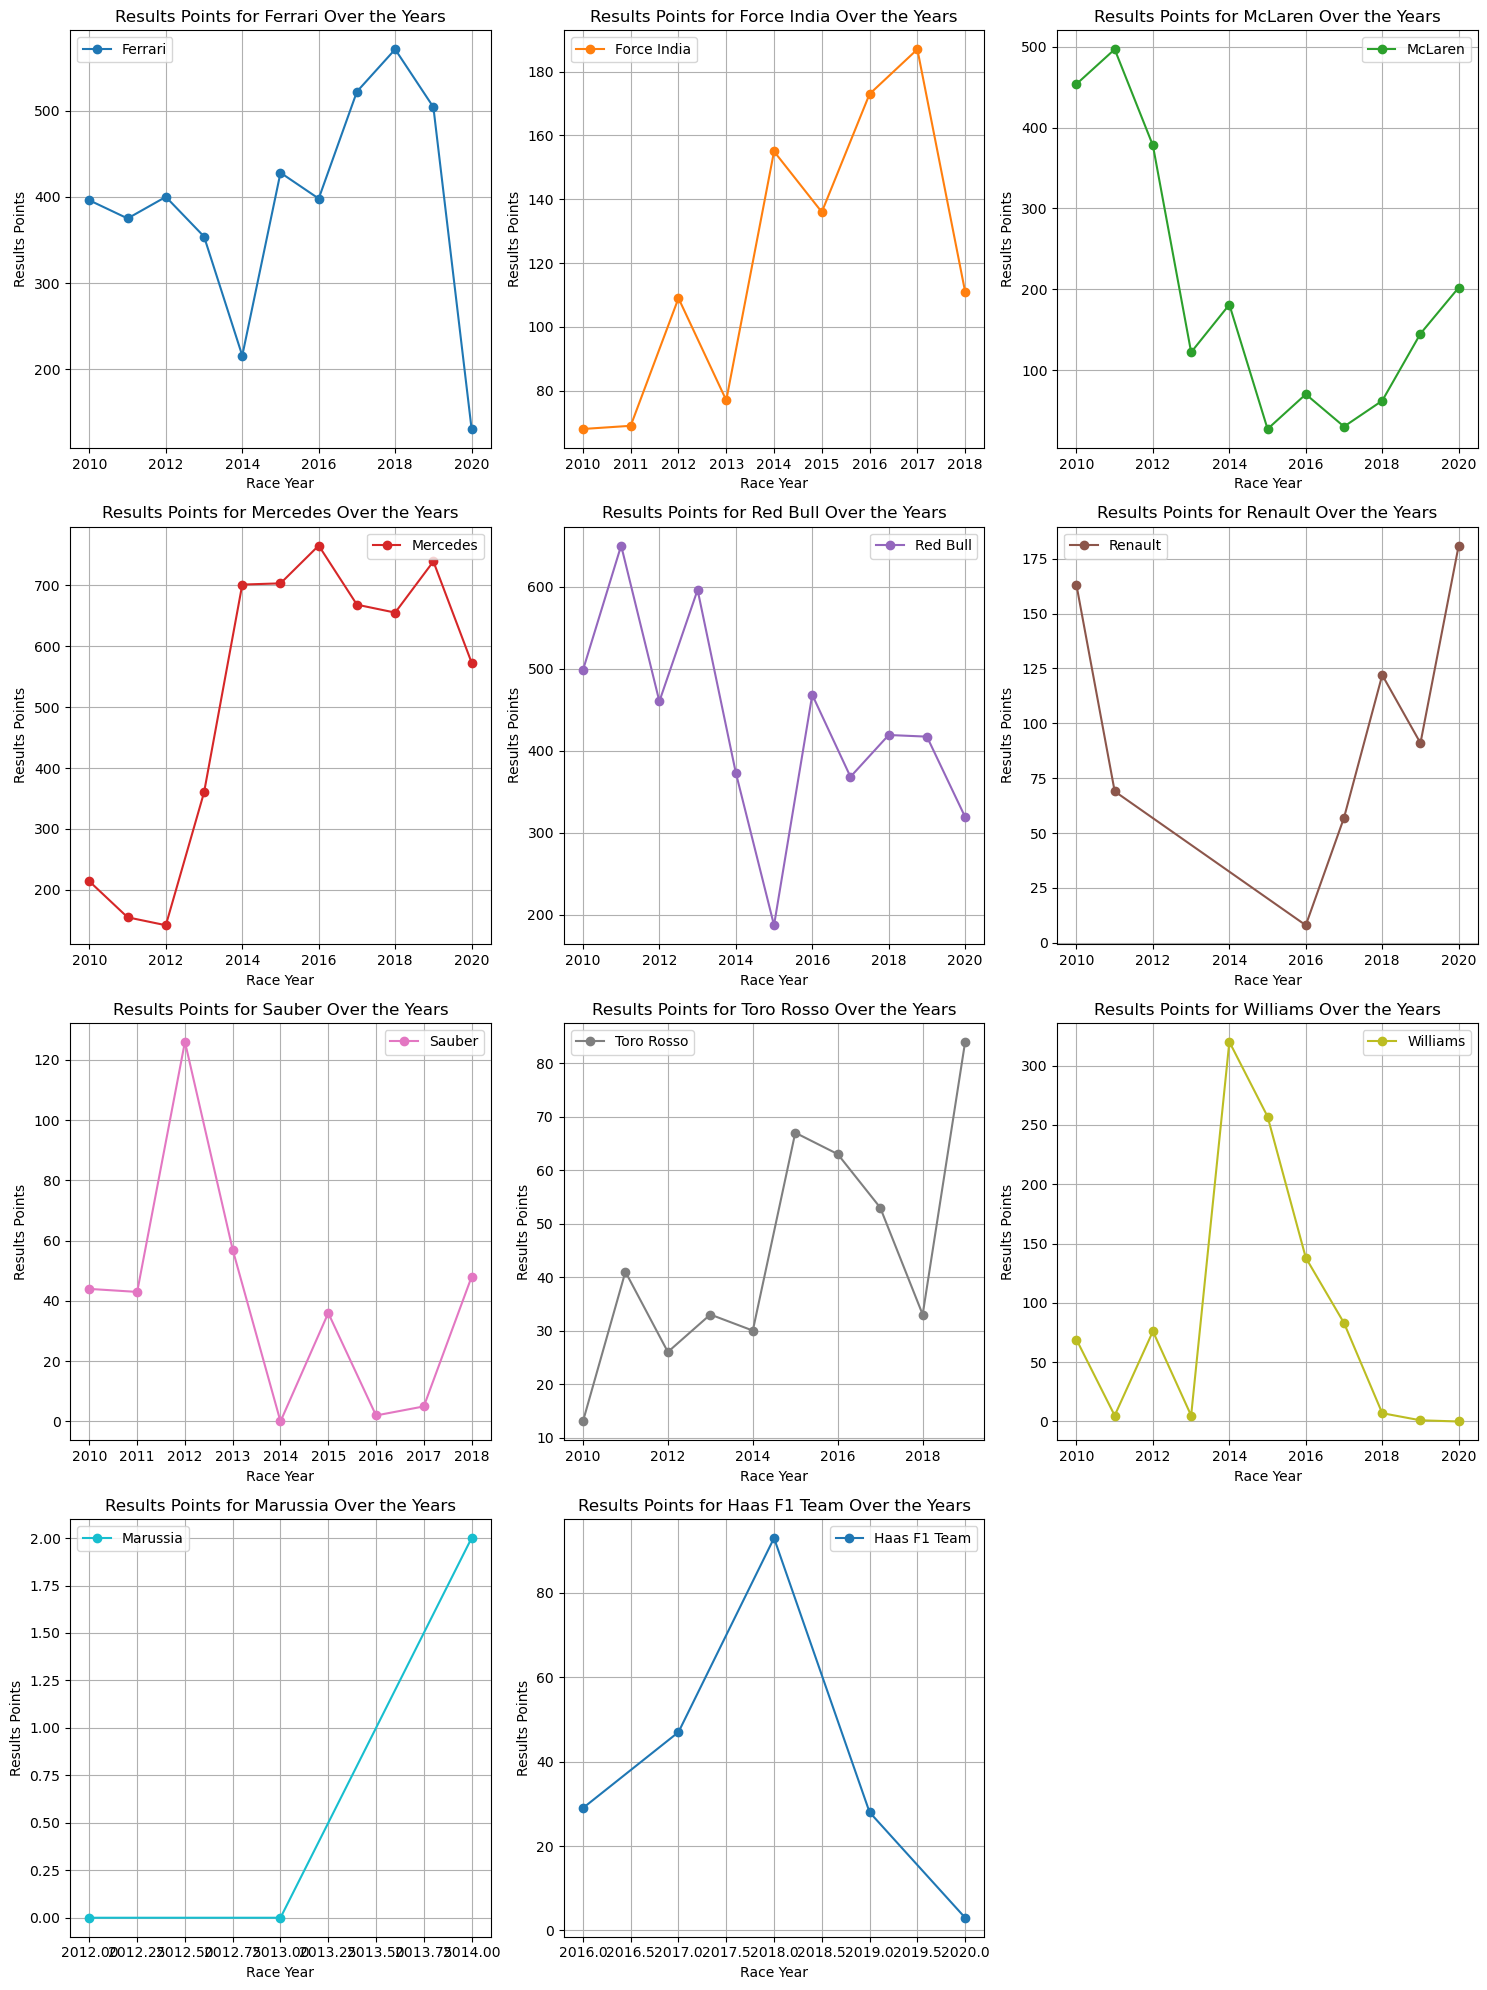

In [86]:
# List of constructors to exclude
exclude_constructors = ['Caterham', 'Virgin', 'Lotus', 'Lotus F1', 'HRT', 'Manor Marussia', 'Alfa Romeo', 'Racing Point', 'AlphaTauri']

# Filtering out the constructors to be excluded
filtered_data = GroupData[~GroupData['constructor_name'].isin(exclude_constructors)]

# Getting the unique constructors from the filtered data
constructors = filtered_data['constructor_name'].unique()

# Define the number of plots per row
plots_per_row = 3
num_constructors = len(constructors)

# Calculate the number of rows needed
num_rows = (num_constructors + plots_per_row - 1) // plots_per_row

# Plotting individual line charts for each remaining constructor
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))
colors = plt.get_cmap('tab10')

for i, constructor in enumerate(constructors):
    row = i // plots_per_row
    col = i % plots_per_row
    ax = axes[row, col] if num_constructors > plots_per_row else axes[col]
    constructor_data = filtered_data[filtered_data['constructor_name'] == constructor]
    ax.plot(constructor_data['race_year'], constructor_data['results_points'], 
            marker='o', color=colors(i % 10), label=constructor)
    ax.set_xlabel('Race Year')
    ax.set_ylabel('Results Points')
    ax.set_title(f'Results Points for {constructor} Over the Years')
    ax.grid(True)
    ax.legend()

# If the number of plots is not a multiple of plots_per_row, hide the empty subplots
for i in range(num_constructors, num_rows * plots_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [87]:
GroupData_Driver = Dataset.groupby(['race_year','drivers_name']).agg({'results_points':'sum'}).reset_index()

In [88]:
print(GroupData_Driver)

     race_year       drivers_name  results_points
0         2010       Adrian Sutil            47.0
1         2010        Bruno Senna             0.0
2         2010    Christian Klien             0.0
3         2010       Felipe Massa           144.0
4         2010    Fernando Alonso           252.0
..         ...                ...             ...
256       2020  Pietro Fittipaldi             0.0
257       2020    Romain Grosjean             2.0
258       2020   Sebastian Vettel            33.0
259       2020       Sergio Pérez           125.0
260       2020    Valtteri Bottas           223.0

[261 rows x 3 columns]


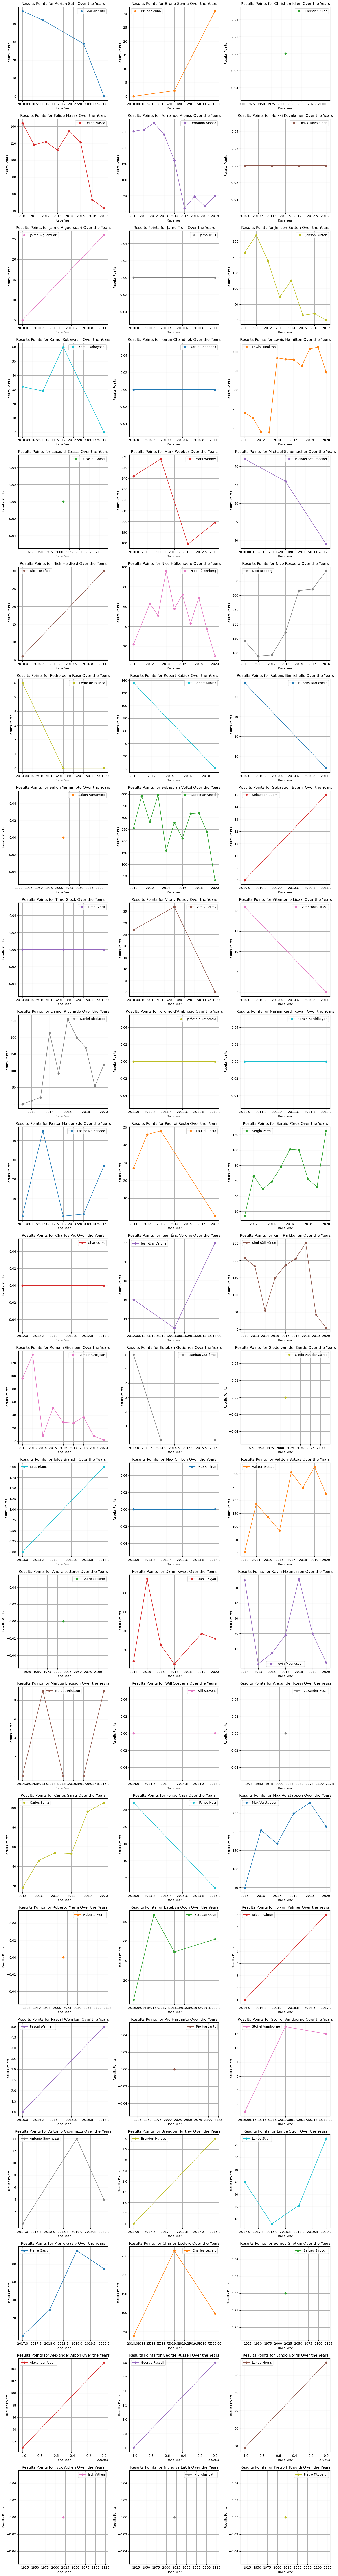

In [89]:
# Get unique drivers
drivers = GroupData_Driver['drivers_name'].unique()
colors = plt.colormaps['tab10']  # Using 'tab10' colormap

# Determine the number of rows needed based on 3 plots per row
n_cols = 3
n_rows = (len(drivers) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Iterate over drivers and axes
for i, (driver, ax) in enumerate(zip(drivers, axes.flatten())):
    driver_data = GroupData_Driver[GroupData_Driver['drivers_name'] == driver]
    ax.plot(driver_data['race_year'], driver_data['results_points'], 
            marker='o', color=colors(i % 10), label=driver)
    ax.set_xlabel('Race Year')
    ax.set_ylabel('Results Points')
    ax.set_title(f'Results Points for {driver} Over the Years')
    ax.grid(True)
    ax.legend()

# Hide any unused subplots
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [90]:
GroupData_DNF = Dataset.groupby(['race_year','drivers_name','Drivers_DNF']).size().reset_index()

In [91]:
GroupData_DNF.head()

race_year     drivers_name  Drivers_DNF   0
0       2010     Adrian Sutil            0  15
1       2010     Adrian Sutil            1   4
2       2010      Bruno Senna            0   9
3       2010      Bruno Senna            1   9
4       2010  Christian Klien            0   2

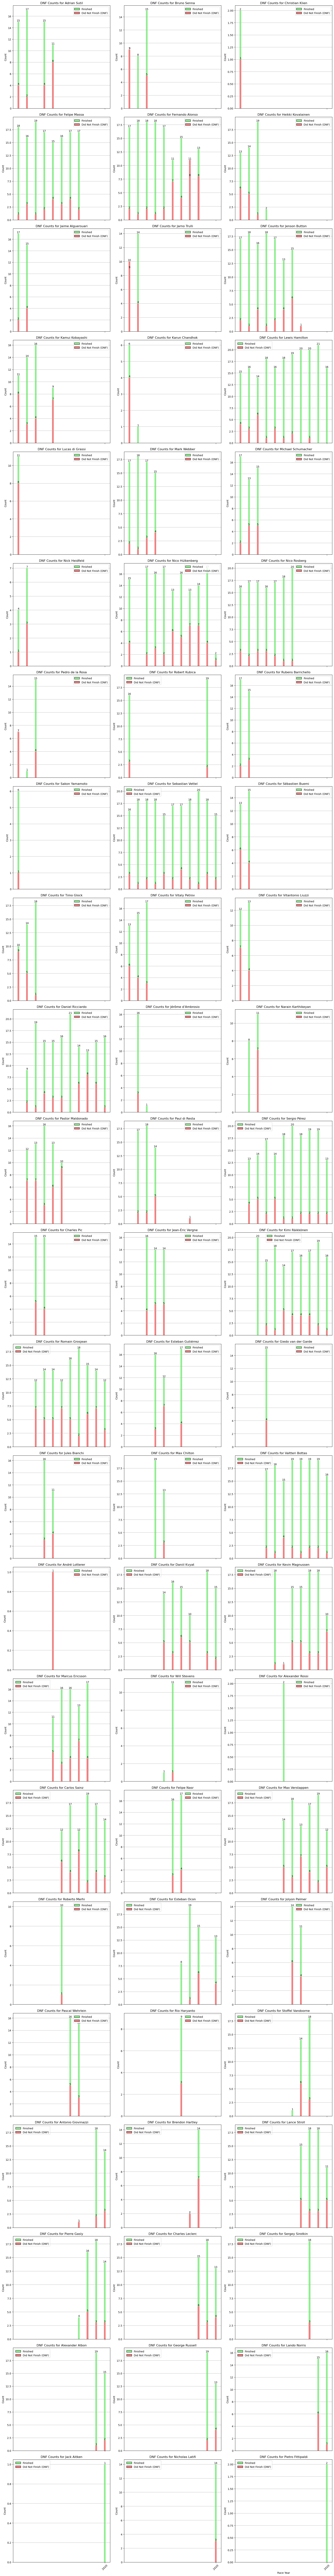

In [92]:
# Group the data by race year, driver name, and whether they finished (DNF) or not
GroupData_DNF = Dataset.groupby(['race_year', 'drivers_name', 'Drivers_DNF']).size().reset_index(name='count_DNF')

drivers = GroupData_DNF['drivers_name'].unique()
num_drivers = len(drivers)

# Calculate the number of rows needed if we display 3 plots per row
num_columns = 3
num_rows = (num_drivers + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 6 * num_rows), sharex=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Define legend handles
handles = [plt.Rectangle((0,0),1,1, color='lightgreen', ec="k"), plt.Rectangle((0,0),1,1, color='lightcoral', ec="k")]
labels = ['Finished', 'Did Not Finish (DNF)']

for ax, driver in zip(axes, drivers):
    driver_data = GroupData_DNF[GroupData_DNF['drivers_name'] == driver]
    bar_labels = driver_data['race_year'].astype(str) + " - " + driver_data['Drivers_DNF'].astype(str)
    
    # Setting lighter colors for the bars
    bar_colors = ['lightgreen' if dnf == 0 else 'lightcoral' for dnf in driver_data['Drivers_DNF']]
    bars = ax.bar(driver_data['race_year'], driver_data['count_DNF'], 
                  color=bar_colors, width=0.2)
    
    # Adding data labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')
    
    ax.set_title(f'DNF Counts for {driver}')
    ax.set_ylabel('Count')
    ax.set_xticks(driver_data['race_year'])
    ax.set_xticklabels(driver_data['race_year'].astype(str), rotation=45)
    ax.grid(axis='y')
    
    # Add the legend
    ax.legend(handles, labels)

# Hide any unused subplots
for i in range(num_drivers, len(axes)):
    fig.delaxes(axes[i])

plt.xlabel('Race Year')
plt.tight_layout()
plt.show()

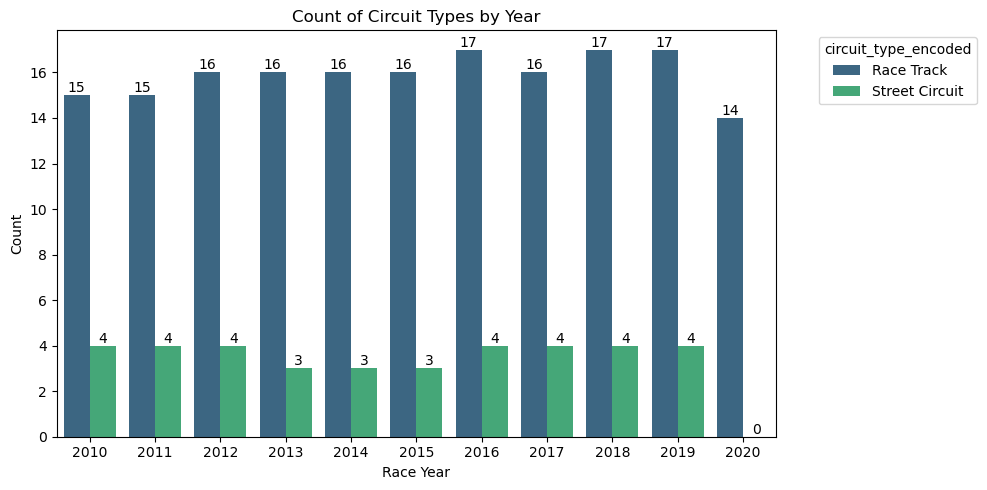

In [93]:
#Visualisation to show different types of race tracks used for Formula 1 Grand Prix per year
Dataset_copy = Dataset.copy()
for index, item in Dataset.iterrows():
    if item['circuit_type'] == 1:
        Dataset_copy.loc[index,'circuit_type_encoded'] = 'Street Circuit'
    else:
        Dataset_copy.loc[index,'circuit_type_encoded'] = 'Race Track'
Dataset_filter = Dataset_copy[['race_year','circuits_name','circuit_type','circuit_type_encoded']]
Dataset_temp = Dataset_filter.drop_duplicates()
plt.figure(figsize=(10, 5))
sns.countplot(data=Dataset_temp, x='race_year', hue='circuit_type_encoded', palette='viridis')
plt.xlabel('Race Year')
plt.ylabel('Count')
plt.title('Count of Circuit Types by Year')
plt.legend(title='circuit_type_encoded', bbox_to_anchor=(1.05, 1), loc='upper left')

#Data points
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, '{:.0f}'.format(height),
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

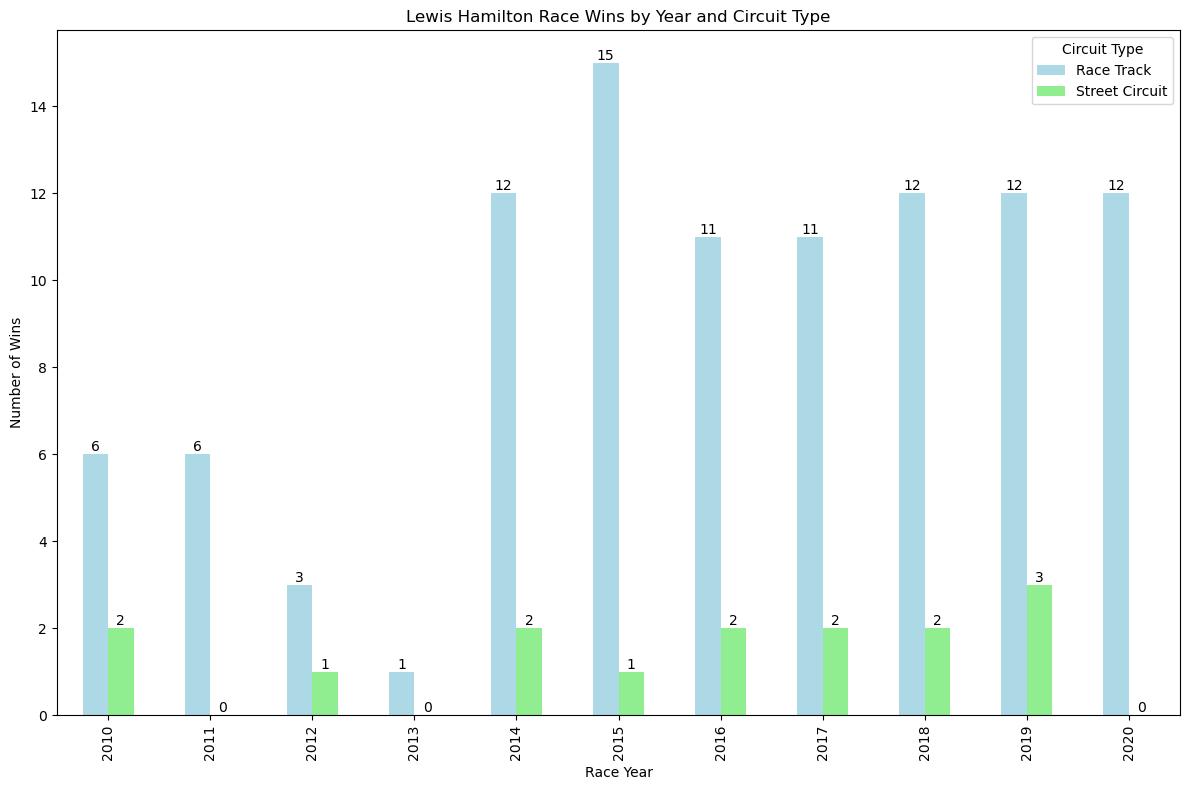

In [94]:
#Visualisation to show driver pole position wins vs circuit type dominance over the years
Dataset_copy = Dataset.copy()
for index, item in Dataset.iterrows():
    if(item['circuit_type'] == 1):
        Dataset_copy.loc[index,'circuit_type_encoded'] = 'Street Circuit'
    else:
        Dataset_copy.loc[index,'circuit_type_encoded'] = 'Race Track'
lewis_wins = Dataset_copy[(Dataset_copy['drivers_name'] == 'Lewis Hamilton') & (Dataset_copy['Drivers_Podium_raceFinish'] == 1)]
Group_lewis_wins = lewis_wins.groupby(['race_year','circuit_type_encoded','drivers_name','Drivers_Pole_raceFinish']).size().reset_index(name='race_won')
pivot_table = Group_lewis_wins.pivot_table(values='race_won', index='race_year', columns='circuit_type_encoded', aggfunc='sum', fill_value=0)

fig, ax = plt.subplots(figsize=(12, 8))
bars = pivot_table.plot(kind='bar', stacked=False, ax=ax, color=['lightblue', 'lightgreen'])
ax.set_title('Lewis Hamilton Race Wins by Year and Circuit Type')
ax.set_xlabel('Race Year')
ax.set_ylabel('Number of Wins')
ax.legend(['Race Track', 'Street Circuit'], title='Circuit Type')

#Data points - Addition 
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [95]:
Dataset.columns

Index(['raceId', 'race_year', 'race_sequence_#', 'circuitId', 'gp_date',
       'Weather', 'resultId', 'driverId', 'constructorId',
       'results_starting_grid#', 'results_finalPosition', 'results_points',
       'results_laps', 'results_Lap#_fastest', 'results_fastestlap_rank',
       'results_fastestLapSpeed', 'results_statusId', 'qualifyId', 'q1', 'q2',
       'q3', 'drivers_number', 'drivers_code', 'drivers_dob',
       'drivers_nationality', 'drivers_name', 'constructor_name',
       'constructor_nationality', 'constructorStandingsId',
       'constructor_standings_wins', 'circuits_name', 'circuits_location',
       'circuits_country', 'circuit_type', 'drivers_age_at_gp_years',
       'drivers_country', 'constructor_country', 'drivers_home_race',
       'constructors_home_race', 'Drivers_DNF', 'driver_experience_rank',
       'Drivers_Podium_raceFinish', 'Drivers_Pole_raceFinish'],
      dtype='object')

#### Machine Learning Model - Considering Only Drivers

In [96]:
Dataset.to_csv('Dataset_temp.csv', index = False)

In [97]:
# Define input features and target variable
input_features = ['race_year', 'circuits_name', 'Weather', 'results_starting_grid#', 
                  'results_laps', 'drivers_code', 'circuit_type', 
                  'drivers_age_at_gp_years', 'driver_experience_rank', 'Drivers_DNF']
target_variable = 'results_finalPosition'

# Extract features and target
X = Dataset[input_features]
y = Dataset[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = ['race_year', 'Weather', 'results_starting_grid#', 'results_laps', 
                    'drivers_age_at_gp_years', 'driver_experience_rank', 'Drivers_DNF']
categorical_features = ['circuits_name', 'drivers_code', 'circuit_type']

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial'))
])

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.12934782608695652
Classification Report:
              precision    recall  f1-score   support

           1       0.41      0.76      0.53        41
           2       0.12      0.17      0.14        35
           3       0.11      0.06      0.08        47
           4       0.02      0.03      0.02        36
           5       0.12      0.11      0.11        46
           6       0.09      0.08      0.09        49
           7       0.12      0.15      0.13        46
           8       0.14      0.10      0.11        51
           9       0.05      0.04      0.04        48
          10       0.03      0.03      0.03        38
          11       0.09      0.07      0.08        45
          12       0.15      0.17      0.16        46
          13       0.08      0.08      0.08        37
          14       0.13      0.13      0.13        53
          15       0.08      0.07      0.07        46
          16       0.13      0.11      0.12        37
          17       0.00     

In [98]:
# Define input features and target variable
input_features = ['race_year', 'circuits_name', 'Weather', 'results_starting_grid#', 
                  'results_laps', 'drivers_code', 'circuit_type', 
                  'drivers_age_at_gp_years', 'driver_experience_rank', 'Drivers_DNF']
target_variable = 'results_finalPosition'

# Extract features and target
X = Dataset[input_features]
y = Dataset[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = ['race_year', 'Weather', 'results_starting_grid#', 'results_laps', 
                    'drivers_age_at_gp_years', 'driver_experience_rank', 'Drivers_DNF']
categorical_features = ['circuits_name', 'drivers_code', 'circuit_type']

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline with Random Forest
clf_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42))
])

# Define a simpler parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100],  # Fewer trees for faster computation
    'classifier__max_depth': [10, 20],      # Reduced depth range
    'classifier__min_samples_split': [5, 10],  # Fewer splits
    'classifier__min_samples_leaf': [2, 4],    # Larger leaves
}

# Use Grid Search to find the best parameters
grid_search = GridSearchCV(clf_rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Classification Report:')
print(report_rf)

Random Forest Accuracy: 0.1782608695652174
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.76      0.54        41
           2       0.20      0.26      0.23        35
           3       0.21      0.15      0.17        47
           4       0.12      0.17      0.14        36
           5       0.12      0.11      0.11        46
           6       0.20      0.12      0.15        49
           7       0.25      0.33      0.28        46
           8       0.11      0.08      0.09        51
           9       0.14      0.12      0.13        48
          10       0.06      0.05      0.06        38
          11       0.11      0.11      0.11        45
          12       0.18      0.22      0.20        46
          13       0.04      0.05      0.05        37
          14       0.08      0.08      0.08        53
          15       0.24      0.13      0.17        46
          16       0.17      0.08      0.11        37
 

In [99]:
# Filter dataset for positions between 1 and 10
data_filtered = Dataset[Dataset['results_finalPosition'].between(1, 10)]

# Split the data into training and testing sets based on race_year
train_data = data_filtered[data_filtered['race_year'].between(2010, 2018)]
test_data = data_filtered[data_filtered['race_year'].between(2019, 2020)]

# Define input features and target variable
input_features = ['race_year', 'circuits_name', 'Weather', 'results_starting_grid#', 
                  'results_laps', 'drivers_code', 'circuit_type', 'drivers_age_at_gp_years',
                  'driver_experience_rank', 'Drivers_DNF', 'results_points', 
                  'results_fastestLapSpeed', 'drivers_nationality', 'constructor_name',
                  'constructor_standings_wins', 'circuits_country']
target_variable = 'results_finalPosition'

# Extract features and target for training and testing sets
X_train = train_data[input_features]
y_train = train_data[target_variable]
X_test = test_data[input_features]
y_test = test_data[target_variable]

# Define numeric and categorical features
numeric_features = ['race_year', 'Weather', 'results_starting_grid#', 'results_laps', 
                    'drivers_age_at_gp_years', 'driver_experience_rank', 'Drivers_DNF',
                    'results_points', 'results_fastestLapSpeed', 'constructor_standings_wins']
categorical_features = ['circuits_name', 'drivers_code', 'circuit_type', 
                        'drivers_nationality', 'constructor_name', 'circuits_country']

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline with Logistic Regression
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga'))
])

# Define a parameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],  # Regularization strength (inverse of regularization)
}

# Use Grid Search to find the best parameters
grid_search = GridSearchCV(clf_lr, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_lr = best_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Logistic Regression Classification Report:')
print(report_lr)

/Users/harshit/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/harshit/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy: 0.6358839050131926
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        38
           2       0.65      0.95      0.77        38
           3       0.68      0.45      0.54        38
           4       0.69      0.53      0.60        38
           5       0.52      0.39      0.45        38
           6       0.52      0.71      0.60        38
           7       0.66      0.55      0.60        38
           8       0.78      0.55      0.65        38
           9       0.42      0.55      0.48        38
          10       0.61      0.68      0.64        37

    accuracy                           0.64       379
   macro avg       0.65      0.64      0.63       379
weighted avg       0.65      0.64      0.63       379



/Users/harshit/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [100]:
# Filter dataset for positions between 1 and 10
data_filtered = Dataset[Dataset['results_finalPosition'].between(1, 10)]

# Split the data into training and testing sets based on race_year
train_data = data_filtered[data_filtered['race_year'].between(2010, 2018)]
test_data = data_filtered[data_filtered['race_year'].between(2019, 2020)]

# Define input features and target variable
input_features = ['race_year', 'circuits_name', 'Weather', 'results_starting_grid#', 
                  'results_laps', 'drivers_code', 'circuit_type', 'drivers_age_at_gp_years',
                  'driver_experience_rank', 'Drivers_DNF', 'results_points',
                  'constructor_standings_wins']
target_variable = 'results_finalPosition'

# Extract features and target for training and testing sets
X_train = train_data[input_features]
y_train = train_data[target_variable]
X_test = test_data[input_features]
y_test = test_data[target_variable]

# Define numeric and categorical features
numeric_features = ['race_year', 'Weather', 'results_starting_grid#', 'results_laps', 
                    'drivers_age_at_gp_years', 'driver_experience_rank', 'Drivers_DNF',
                    'results_points', 'constructor_standings_wins']
categorical_features = ['circuits_name', 'drivers_code', 'circuit_type']

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline with Random Forest
clf_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42))
])

# Define a parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [100],  # Number of trees in the forest
    'classifier__max_depth': [20],      # Maximum depth of the tree
    'classifier__min_samples_split': [10],  # Minimum samples required to split an internal node
    'classifier__min_samples_leaf': [2],    # Minimum number of samples required to be at a leaf node
}

# Use Grid Search to find the best parameters
grid_search = GridSearchCV(clf_rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Classification Report:')
print(report_rf)

Random Forest Accuracy: 0.7968337730870713
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       0.85      0.87      0.86        38
           3       0.90      0.74      0.81        38
           4       0.80      0.63      0.71        38
           5       0.41      0.34      0.37        38
           6       0.55      0.76      0.64        38
           7       0.65      0.82      0.72        38
           8       0.94      0.89      0.92        38
           9       1.00      0.92      0.96        38
          10       1.00      1.00      1.00        37

    accuracy                           0.80       379
   macro avg       0.81      0.80      0.80       379
weighted avg       0.81      0.80      0.80       379



In [101]:
# Filter dataset for positions between 1 and 10
data_filtered = Dataset[Dataset['results_finalPosition'].between(1, 10)]

# Split the data into training and testing sets based on race_year
train_data = data_filtered[data_filtered['race_year'].between(2010, 2018)]
test_data = data_filtered[data_filtered['race_year'].between(2019, 2020)]

# Define input features and target variable
input_features = ['race_year', 'circuits_name', 'Weather', 'results_starting_grid#', 
                  'results_laps', 'drivers_code', 'circuit_type', 'drivers_age_at_gp_years',
                  'driver_experience_rank', 'Drivers_DNF', 'results_points', 
                  'results_fastestLapSpeed', 'drivers_nationality', 'constructor_name',
                  'constructor_standings_wins', 'circuits_country']
target_variable = 'results_finalPosition'

# Extract features and target for training and testing sets
X_train = train_data[input_features]
y_train = train_data[target_variable]
X_test = test_data[input_features]
y_test = test_data[target_variable]

# Define numeric and categorical features
numeric_features = ['race_year', 'Weather', 'results_starting_grid#', 'results_laps', 
                    'drivers_age_at_gp_years', 'driver_experience_rank', 'Drivers_DNF',
                    'results_points', 'results_fastestLapSpeed', 'constructor_standings_wins']
categorical_features = ['circuits_name', 'drivers_code', 'circuit_type', 
                        'drivers_nationality', 'constructor_name', 'circuits_country']

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline with Gradient Boosting Classifier
clf_gbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Define a parameter grid for Gradient Boosting
param_grid = {
    'classifier__n_estimators': [100, 200],  # Number of boosting stages to be run
    'classifier__learning_rate': [0.01, 0.1],  # Learning rate shrinks the contribution of each tree
    'classifier__max_depth': [3, 5],         # Maximum depth of the individual trees
}

# Use Grid Search to find the best parameters
grid_search = GridSearchCV(clf_gbm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_gbm = best_model.predict(X_test)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
report_gbm = classification_report(y_test, y_pred_gbm)

print(f'Gradient Boosting Accuracy: {accuracy_gbm}')
print('Gradient Boosting Classification Report:')
print(report_gbm)

Gradient Boosting Accuracy: 0.9656992084432717
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        38
           3       1.00      0.87      0.93        38
           4       0.93      1.00      0.96        38
           5       1.00      0.92      0.96        38
           6       0.95      1.00      0.97        38
           7       0.97      0.95      0.96        38
           8       0.95      0.97      0.96        38
           9       0.88      0.95      0.91        38
          10       1.00      1.00      1.00        37

    accuracy                           0.97       379
   macro avg       0.97      0.97      0.97       379
weighted avg       0.97      0.97      0.97       379



In [102]:
def train_test_predict(df):
    # Filter dataset for positions between 1 and 10
    data_filtered = df[df['results_finalPosition'].between(1, 10)]
    
    # Split the data into training and testing sets based on race_year
    train_data = data_filtered[data_filtered['race_year'].between(2010, 2018)]
    test_data_2019 = data_filtered[data_filtered['race_year'] == 2019]
    predict_data_2020 = data_filtered[data_filtered['race_year'] == 2020]
    
    # Define input features and target variable
    input_features = ['race_year', 'circuits_name', 'Weather', 'results_starting_grid#', 
                      'results_laps', 'drivers_code', 'circuit_type', 'drivers_age_at_gp_years',
                      'driver_experience_rank', 'Drivers_DNF', 'results_points', 
                      'results_fastestLapSpeed', 'drivers_nationality', 'constructor_name',
                      'constructor_standings_wins', 'circuits_country']
    target_variable = 'results_finalPosition'
    
    # Extract features and target for training and testing sets
    X_train = train_data[input_features]
    y_train = train_data[target_variable]
    X_test_2019 = test_data_2019[input_features]
    y_test_2019 = test_data_2019[target_variable]
    X_predict_2020 = predict_data_2020[input_features]
    
    # Define numeric and categorical features
    numeric_features = ['race_year', 'Weather', 'results_starting_grid#', 'results_laps', 
                        'drivers_age_at_gp_years', 'driver_experience_rank', 'Drivers_DNF',
                        'results_points', 'results_fastestLapSpeed', 'constructor_standings_wins']
    categorical_features = ['circuits_name', 'drivers_code', 'circuit_type', 
                            'drivers_nationality', 'constructor_name', 'circuits_country']
    
    # Preprocessing pipelines
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    # Define the model pipeline with Gradient Boosting Classifier
    clf_gbm = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])
    
    # Define a parameter grid for Gradient Boosting
    param_grid = {
        'classifier__n_estimators': [100, 200],  # Number of boosting stages to be run
        'classifier__learning_rate': [0.01, 0.1],  # Learning rate shrinks the contribution of each tree
        'classifier__max_depth': [3, 5],         # Maximum depth of the individual trees
    }
    
    # Use Grid Search to find the best parameters
    grid_search = GridSearchCV(clf_gbm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Make predictions on the 2019 test set
    y_pred_gbm_2019 = best_model.predict(X_test_2019)
    
    # Evaluate the model on 2019 test data
    accuracy_gbm_2019 = accuracy_score(y_test_2019, y_pred_gbm_2019)
    report_gbm_2019 = classification_report(y_test_2019, y_pred_gbm_2019)
    
    print(f'Gradient Boosting Accuracy (2019): {accuracy_gbm_2019}')
    print('Gradient Boosting Classification Report (2019):')
    print(report_gbm_2019)
    
    # Predict results_finalPosition for the year 2020
    y_pred_2020 = best_model.predict(X_predict_2020)
    predict_data_2020['predicted_finalPosition'] = y_pred_2020
    
    return predict_data_2020

# Load the dataset
dataset_path = 'Dataset_temp.csv'  # Use your actual path
df = pd.read_csv(dataset_path)

# Call the function with the dataset
predicted_2020 = train_test_predict(df)

# Display the first few rows of predictions for 2020
print(predicted_2020.head())

Gradient Boosting Accuracy (2019): 0.9712918660287081
Gradient Boosting Classification Report (2019):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      0.86      0.92        21
           4       0.88      1.00      0.93        21
           5       1.00      0.86      0.92        21
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        21
           9       0.88      1.00      0.93        21
          10       1.00      1.00      1.00        20

    accuracy                           0.97       209
   macro avg       0.97      0.97      0.97       209
weighted avg       0.97      0.97      0.97       209

     raceId  race_year  race_sequence_#  circuitId     gp_date  Weather  \
611    1045       2020               15          3  2020-11-29  

/var/folders/hz/4z22rm6d1cv1n0lvyz_hzvq80000gn/T/ipykernel_10514/1026350922.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_2020['predicted_finalPosition'] = y_pred_2020


In [103]:
def allocate_points(position):
    if position == 1:
        return 25
    elif position == 2:
        return 18
    elif position == 3:
        return 15
    elif position == 4:
        return 12
    elif position == 5:
        return 10
    elif position == 6:
        return 8
    elif position == 7:
        return 6
    elif position == 8:
        return 4
    elif position == 9:
        return 2
    elif position == 10:
        return 1
    else:
        return 0

predicted_2020['predicted_driver_points'] = predicted_2020['predicted_finalPosition'].apply(allocate_points)

print(predicted_2020[['predicted_finalPosition', 'predicted_driver_points']].head())

     predicted_finalPosition  predicted_driver_points
611                        7                        6
612                        9                        2
613                        5                       10
614                        2                       18
656                        5                       10


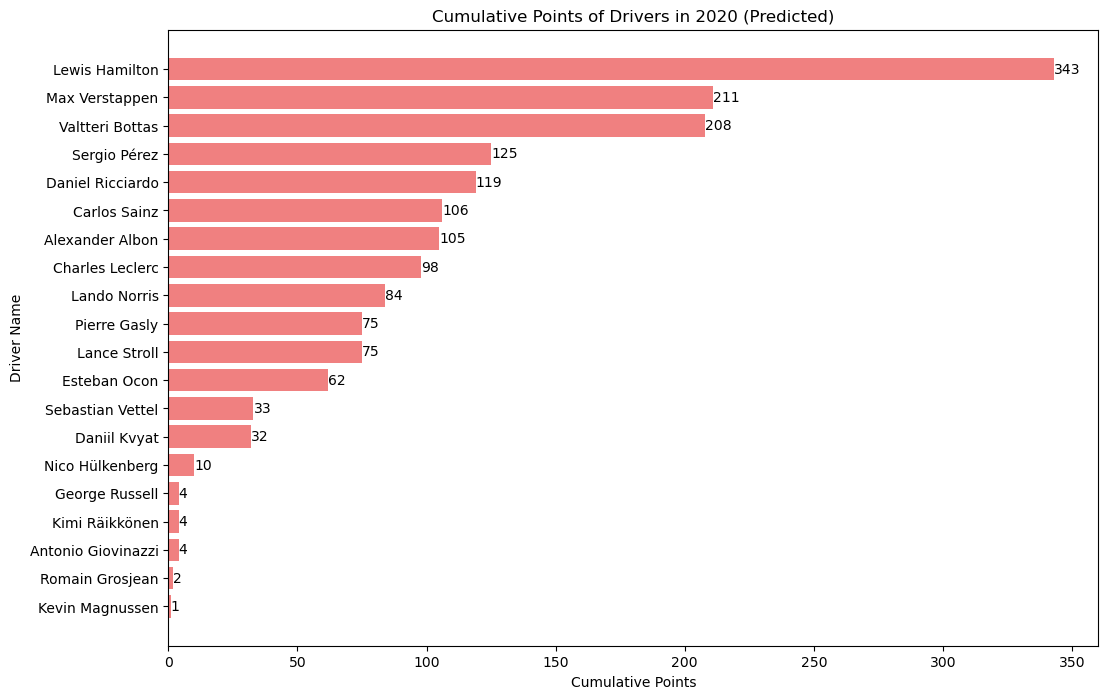

In [104]:
# Group by driver and sum the points to get cumulative points
cumulative_points = predicted_2020.groupby('drivers_name')['predicted_driver_points'].sum().reset_index()

# Sort the drivers by cumulative points in descending order
cumulative_points = cumulative_points.sort_values(by='predicted_driver_points', ascending=False)

# Plotting the cumulative points with colors
plt.figure(figsize=(12, 8))
bars = plt.barh(cumulative_points['drivers_name'], cumulative_points['predicted_driver_points'], color='lightcoral')
plt.xlabel('Cumulative Points')
plt.ylabel('Driver Name')
plt.title('Cumulative Points of Drivers in 2020 (Predicted)')
plt.gca().invert_yaxis()  # To display the highest at the top

# Adding value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width()}', va='center', ha='left')

plt.show()

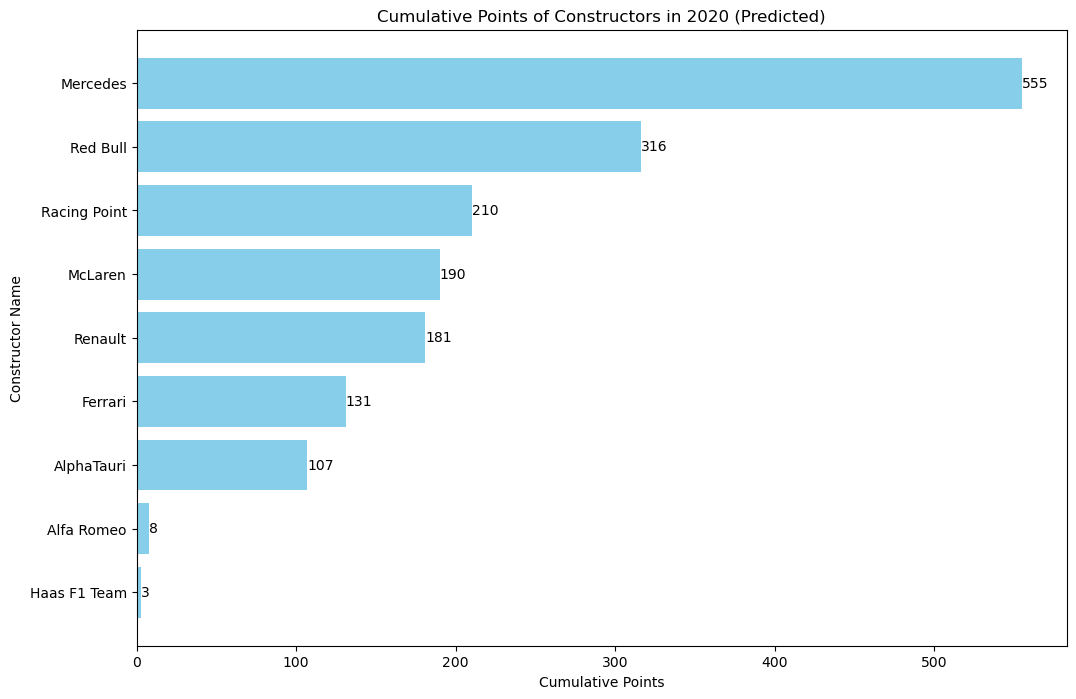

In [105]:
# Group by constructor and sum the points to get cumulative points
cumulative_points_by_constructor = predicted_2020.groupby('constructor_name')['predicted_driver_points'].sum().reset_index()

# Sort the constructors by cumulative points in descending order
cumulative_points_by_constructor = cumulative_points_by_constructor.sort_values(by='predicted_driver_points', ascending=False)

# Plotting the cumulative points with colors
plt.figure(figsize=(12, 8))
bars = plt.barh(cumulative_points_by_constructor['constructor_name'], cumulative_points_by_constructor['predicted_driver_points'], color='skyblue')
plt.xlabel('Cumulative Points')
plt.ylabel('Constructor Name')
plt.title('Cumulative Points of Constructors in 2020 (Predicted)')
plt.gca().invert_yaxis()  # To display the highest at the top

# Adding value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width()}', va='center', ha='left')

plt.show()

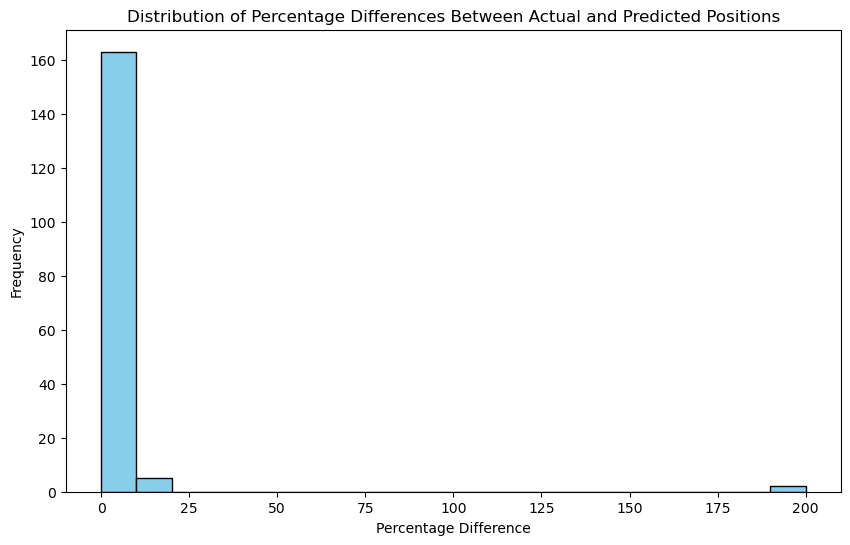

In [106]:
# Calculate the percentage difference
predicted_2020['percentage_difference'] = np.abs(
    (predicted_2020['results_finalPosition'] - predicted_2020['predicted_finalPosition']) / predicted_2020['results_finalPosition']
) * 100

# Display the first few rows to verify the new column
#print(predicted_2020[['results_finalPosition', 'predicted_finalPosition', 'percentage_difference']].head())

# Visualize the percentage differences
plt.figure(figsize=(10, 6))
plt.hist(predicted_2020['percentage_difference'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Percentage Differences Between Actual and Predicted Positions')
plt.xlabel('Percentage Difference')
plt.ylabel('Frequency')
plt.show()

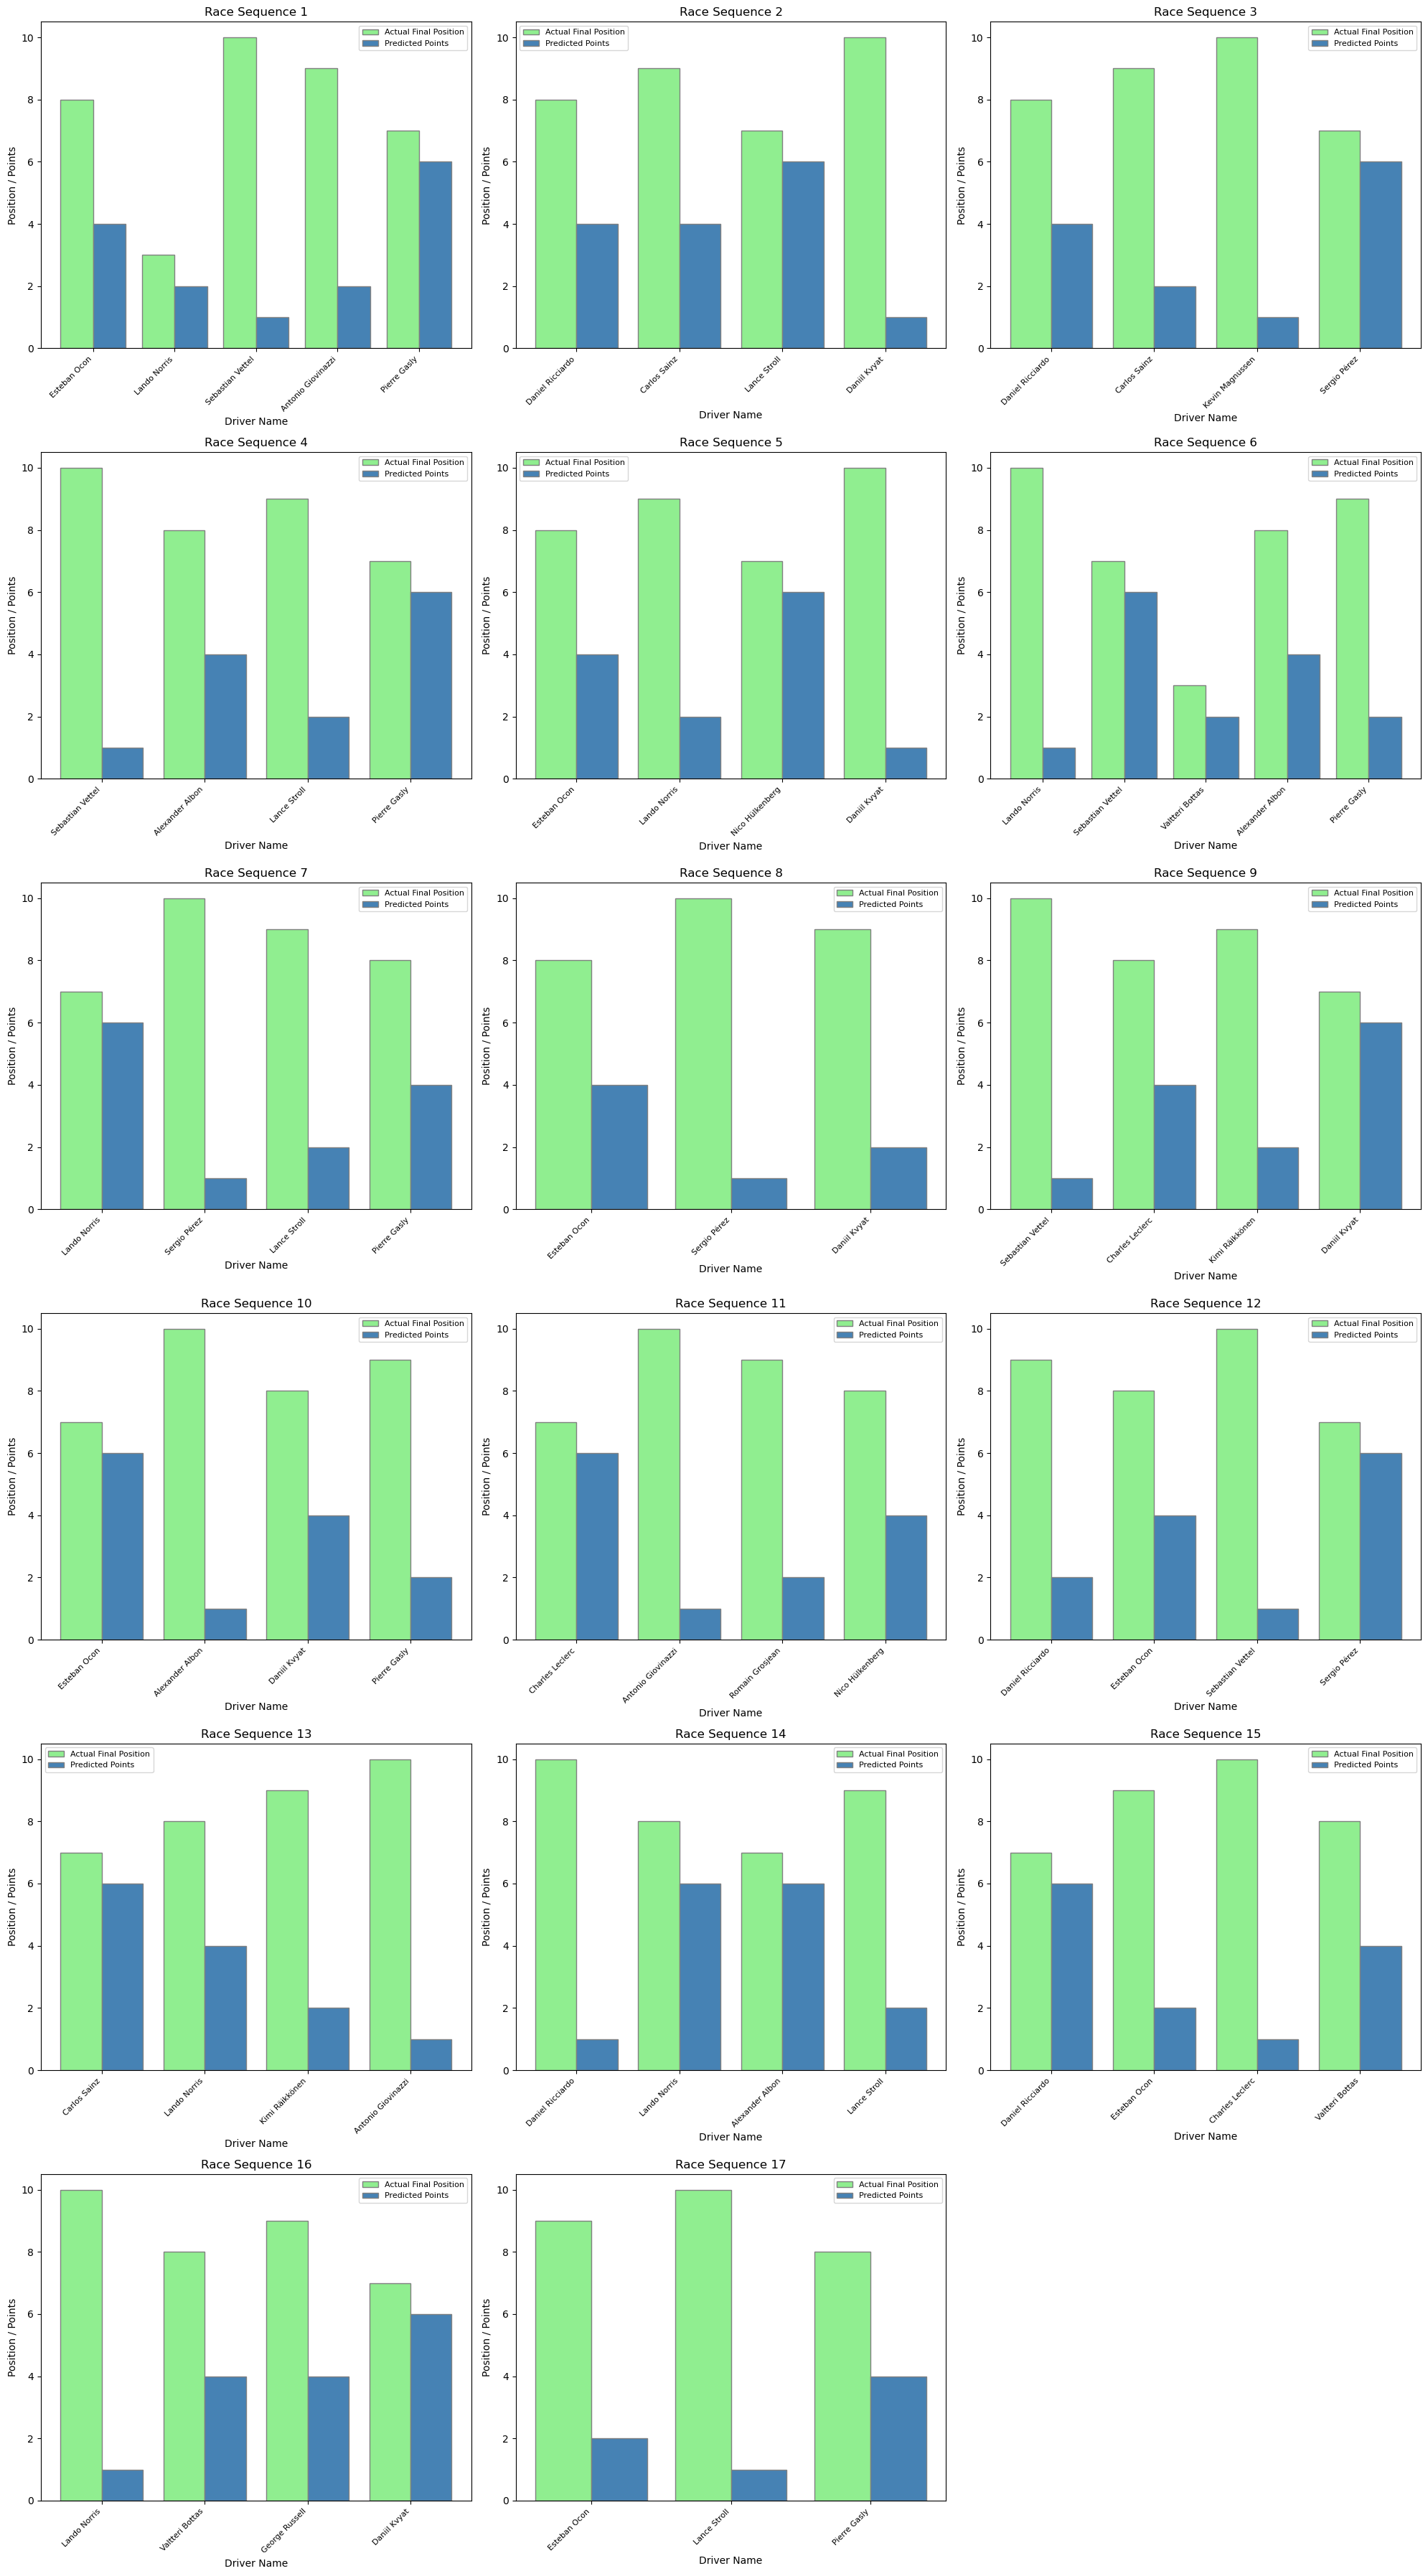

In [107]:
# Calculate the difference between results_finalPosition and predicted_driver_points
predicted_2020['difference'] = predicted_2020['results_finalPosition'] - predicted_2020['predicted_driver_points']

# Filter the dataframe to include only rows where the difference is greater than 0
filtered_data = predicted_2020[predicted_2020['difference'] > 0]

# Get the unique race sequences in ascending order
race_sequences = np.sort(filtered_data['race_sequence_#'].unique())

# Define the number of plots per row
plots_per_row = 3

# Determine the number of rows needed
n_rows = int(np.ceil(len(race_sequences) / plots_per_row))

# Plotting
plt.figure(figsize=(20, n_rows * 6))

for i, race in enumerate(race_sequences):
    # Filter data for the current race sequence
    race_data = filtered_data[filtered_data['race_sequence_#'] == race]
    
    # Set the positions and width for the bars
    bar_width = 0.4
    r1 = np.arange(len(race_data))
    r2 = [x + bar_width for x in r1]
    
    # Create a subplot for each race sequence
    plt.subplot(n_rows, plots_per_row, i + 1)
    plt.bar(r1, race_data['results_finalPosition'], color='lightgreen', width=bar_width, edgecolor='grey', label='Actual Final Position')
    plt.bar(r2, race_data['predicted_driver_points'], color='steelblue', width=bar_width, edgecolor='grey', label='Predicted Points')
    
    # Adding labels and title
    plt.xlabel('Driver Name', fontsize=10)
    plt.ylabel('Position / Points', fontsize=10)
    plt.title(f'Race Sequence {race}', fontsize=12)
    
    # Add x-axis labels with driver names centered between the bars
    plt.xticks([r + bar_width/2 for r in range(len(race_data))], race_data['drivers_name'], rotation=45, ha='right', fontsize=8)
    
    plt.legend(fontsize=8)

# Adjust layout to ensure plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()